# Dissertation

**Title: Understand the mobility inequality through the spatial distribution of ethnicity and deprivation in London**

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import statsmodels.api as sm

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling

%matplotlib inline

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Wangle datasets

In [3]:
# ptal_grid_2010 = pd.read_csv("../PTAL_Data_2010/GL PTALS 2010 Data Grid Points.csv")

In [4]:
# ptal_grid_2010.sample(10)

In [5]:
# gdf_2010 = gpd.GeoDataFrame(ptal_grid_2010, geometry = gpd.points_from_xy(ptal_grid_2010['X'], ptal_grid_2010['Y'], crs="EPSG:27700"))

In [6]:
# gdf_2010.plot(markersize=.1, figsize=(8, 8), column='PTAI', cmap='Blues',scheme="Natural_Breaks")

In [7]:
## already had an output file
# gdf_2010.to_json()
# gdf_2010.to_file("ptal_grid_points_2010.geojson", driver="GeoJSON")  

____

In [8]:
# ptal2023_grid_raw = gpd.read_file("../TFL_files/PTAL 2019 and 2023/PTAL 2019 and 2023/2023CY_PTAL.shp")

In [9]:
# ptal2023_grid_raw.shape

In [10]:
# ptal2023_grid_raw.head(2)

In [11]:
# ptal2023_grid_raw.columns

- AI: Access Index
- BUS: AI bus value
- LUL: London Underground
- RAIL: rail
- TRAM: tram

In [12]:
# Only extract attributes we will use in this coursework.
# ptal2023_grid = ptal2023_grid_raw[['AI','BUS', 'LUL', 'RAIL', 'TRAM', 'geometry']]

In [13]:
# ptal2023_grid["latitude"] = ptal2023_grid.centroid.map(lambda p: p.x)
# ptal2023_grid["longitude"] = ptal2023_grid.centroid.map(lambda p: p.y)

In [14]:
# print(ptal2023_grid.shape)
# ptal2023_grid.sample(5)

In [15]:
# ptal2023_point_temp = ptal2023_grid.copy()
# ptal2023_point_temp = ptal2023_point_temp.drop(["geometry"],axis = 1)

In [16]:
# ptal2023_point_temp.head()

In [17]:
# ptal2023_point = gpd.GeoDataFrame(ptal2023_point_temp, geometry=gpd.points_from_xy(ptal2023_point_temp.latitude, ptal2023_point_temp.longitude))
# ptal2023_point.sample(5)

In [18]:
# ptal2023_point = ptal2023_point.drop(["latitude","longitude"],axis = 1)

In [19]:
# when we create a new geometry data, must set the crs manully
# ptal2023_point = ptal2023_point.set_crs(27700, allow_override=True)

In [20]:
# ptal2023_point.crs

In [21]:
#this is the final ptal point data, now store it into a geojson file and join this value into LSOA unit in Qgis, which is easier.
# ptal2023_point.crs
# ptal2023_point.to_json()
# ptal2023_point.to_file("ptal2023_point.geojson", driver="GeoJSON")  

In [22]:
# to check the distribution of AI value, also the categories. To decide whether we use mean or median.
# ptal2023_point.head(2)

In [23]:
# sns.displot(data=ptal2023_point, x="AI", kde=True,height=10,aspect=2)

Although the overall PTAL values are unsymmetrical, the number of points within one LSOA is quite small: around 10-20. The points are all meaningful and we want to include them into the representative value. Thus, instead of throwing away the outliers, we use mean value rather than median value to represent the AI value in this case.


* Now we have the PTAL value for each LSOA in 2023. read in this file*

____

## Clean deprivation variables: get education and income ranking.

In [24]:
dep2019_raw = pd.read_csv("../data/deprivation/All_IoD2019.csv")
dep2010_raw = pd.read_csv("../data/deprivation/All_IoD2010.csv")
print(dep2019_raw.shape)
dep2019_raw.columns

(32844, 57)


Index(['LSOA code (2011)', 'LSOA name (2011)', 'Local Authority District code (2019)', 'Local Authority District name (2019)', 'Index of Multiple Deprivation (IMD) Score', 'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)', 'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)', 'Income Score (rate)', 'Income Rank (where 1 is most deprived)', 'Income Decile (where 1 is most deprived 10% of LSOAs)', 'Employment Score (rate)', 'Employment Rank (where 1 is most deprived)', 'Employment Decile (where 1 is most deprived 10% of LSOAs)', 'Education, Skills and Training Score', 'Education, Skills and Training Rank (where 1 is most deprived)', 'Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)', 'Health Deprivation and Disability Score', 'Health Deprivation and Disability Rank (where 1 is most deprived)', 'Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs)', 'Crime Score',
       'Crime Ran

In [25]:
## we don't use rank here because the ranking is based on the whole England Area. 
## Instead, we only use deprivation score in London and then use percentiles to represent rankings.
dep2019 = dep2019_raw[[
                    'LSOA code (2011)', 

                    'Index of Multiple Deprivation (IMD) Score',

                    'Income Score (rate)',    
                    'Employment Score (rate)', 
                    'Education, Skills and Training Score',
                    'Health Deprivation and Disability Score',
                    'Crime Score',     
                    'Barriers to Housing and Services Score',
                    'Living Environment Score'
]]
dep2010 = dep2010_raw[[
                    'LSOA CODE', 
                    'IMD SCORE', 

                    'INCOME SCORE', 
                    'EMPLOYMENT SCORE',
                    'HEALTH DEPRIVATION AND DISABILITY SCORE',
                    'EDUCATION SKILLS AND TRAINING SCORE',
                    'BARRIERS TO HOUSING AND SERVICES SCORE',
                    'CRIME AND DISORDER SCORE',
                    'LIVING ENVIRONMENT SCORE',
          ]]
# clean names of the columns
dep2019 = dep2019.rename(columns={'LSOA code (2011)':"LSOAcd_2011", 
                    'Index of Multiple Deprivation (IMD) Score':"IMD_score_2019",
                    'Income Score (rate)':"Income_score_2019",    
                    'Employment Score (rate)':"Employment_score_2019", 
                    'Education, Skills and Training Score':"Education_score_2019",
                    'Health Deprivation and Disability Score':"Health_score_2019",
                    'Crime Score':"Crime_score_2019",     
                    'Barriers to Housing and Services Score':"Housing_score_2019",
                    'Living Environment Score':"Environment_score_2019"})
dep2010 = dep2010.rename(columns={
                        'LSOA CODE':"LSOAcd_2001", 
                    'IMD SCORE':"IMD_score_2010", 
                    'INCOME SCORE':"Income_score_2010", 
                    'EMPLOYMENT SCORE':"Employment_score_2010",
                    'HEALTH DEPRIVATION AND DISABILITY SCORE':"Education_score_2010",
                    'EDUCATION SKILLS AND TRAINING SCORE':"Health_score_2010",
                    'BARRIERS TO HOUSING AND SERVICES SCORE':"Housing_score_2010",
                    'CRIME AND DISORDER SCORE':"Crime_score_2010",
                    'LIVING ENVIRONMENT SCORE':"Environment_score_2010"})

**Transform the 2001 lsoa code to 2011 code (REALLY annoying)**

In [26]:
cd01tocd11 = pd.read_csv("../data/lsoa_code_transform/Lower_Layer_Super_Output_Area_(2001)_to_Lower_Layer_Super_Output_Area_(2011)_to_Local_Authority_District_(2011)_Lookup_in_England_and_Wales.csv")

In [27]:
cd01tocd11 = cd01tocd11[['LSOA01CD',  'LSOA11CD']]

In [28]:
cd01tocd11

LSOA01CD   LSOA11CD
0      E01031349  E01031349
1      E01031350  E01031350
2      E01031351  E01031351
3      E01031352  E01031352
4      E01031370  E01031370
...          ...        ...
34912  E01013341  E01013341
34913  E01013342  E01013342
34914  E01013423  E01013423
34915  E01013424  E01013424
34916  E01013425  E01013425

[34917 rows x 2 columns]

In [29]:
cd01tocd11.loc[cd01tocd11['LSOA01CD'] == "E01001643"]


LSOA01CD   LSOA11CD
12428  E01001643  E01033746

In [30]:
dep2010.columns

Index(['LSOAcd_2001', 'IMD_score_2010', 'Income_score_2010', 'Employment_score_2010', 'Education_score_2010', 'Health_score_2010', 'Housing_score_2010', 'Crime_score_2010', 'Environment_score_2010'], dtype='object')

In [31]:
dep2010_ = dep2010.merge(cd01tocd11, left_on="LSOAcd_2001", right_on = "LSOA01CD",how="inner")
dep2010_.isna().sum()

LSOAcd_2001               0
IMD_score_2010            0
Income_score_2010         0
Employment_score_2010     0
Education_score_2010      0
Health_score_2010         0
Housing_score_2010        0
Crime_score_2010          0
Environment_score_2010    0
LSOA01CD                  0
LSOA11CD                  0
dtype: int64

In [32]:
dep2010_.loc[dep2010_['LSOA01CD'] == "E01001643"]


LSOAcd_2001                           IMD_score_2010                        Income_score_2010                    Employment_score_2010                     Education_score_2010                        Health_score_2010                       Housing_score_2010                         Crime_score_2010                   Environment_score_2010   LSOA01CD   LSOA11CD
1652   E01001643                                  30.9000                                   0.2300                                   0.1100                                   0.3000                                   8.4300                                  22.4200                                   1.4400                                  52.6600  E01001643  E01033746

**Subsetting London for 2010 and 2019; Get new rankings for each year. Because the deprivation index can only be used to compare in rankings, not absolute scores.**

In [33]:
ptal2023_lsoa_raw = gpd.read_file("../analysis/ptal2023JoinToLSOAmean.geojson")
LondonLSOAs = ptal2023_lsoa_raw[['LSOA11CD','geometry']]

In [34]:
LondonLSOAs.shape

(4835, 2)

In [35]:
LondonLSOAs.loc[LondonLSOAs['LSOA11CD'] == "E01033730"]


LSOA11CD                                           geometry
4818  E01033730  MULTIPOLYGON (((537830.389 177685.093, 537790....

In [36]:
deprivation_raw = pd.merge(LondonLSOAs, dep2010_, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
deprivation_raw = pd.merge(deprivation_raw, dep2019, left_on='LSOA11CD', right_on='LSOAcd_2011', how='left')

In [37]:
deprivation_raw.columns

Index(['LSOA11CD', 'geometry', 'LSOAcd_2001', 'IMD_score_2010', 'Income_score_2010', 'Employment_score_2010', 'Education_score_2010', 'Health_score_2010', 'Housing_score_2010', 'Crime_score_2010', 'Environment_score_2010', 'LSOA01CD', 'LSOAcd_2011', 'IMD_score_2019', 'Income_score_2019', 'Employment_score_2019', 'Education_score_2019', 'Health_score_2019', 'Crime_score_2019', 'Housing_score_2019', 'Environment_score_2019'], dtype='object')

In [38]:
deprivation = deprivation_raw.copy()

In [39]:
duplicates = list(deprivation_raw[deprivation_raw.duplicated('LSOA11CD')].LSOA11CD)

In [40]:
for item in duplicates:
    slices = list(deprivation.loc[deprivation['LSOA11CD'] == item].index)
    deprivation.Income_score_2010.iloc[slices[0]] = (deprivation.Income_score_2010.iloc[slices[0]] +deprivation.Income_score_2010.iloc[slices[1]])/2
    deprivation.drop(slices[1],inplace=True)
deprivation

/tmp/ipykernel_86/3376805309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deprivation.Income_score_2010.iloc[slices[0]] = (deprivation.Income_score_2010.iloc[slices[0]] +deprivation.Income_score_2010.iloc[slices[1]])/2
/tmp/ipykernel_86/3376805309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deprivation.Income_score_2010.iloc[slices[0]] = (deprivation.Income_score_2010.iloc[slices[0]] +deprivation.Income_score_2010.iloc[slices[1]])/2
/tmp/ipykernel_86/3376805309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

LSOA11CD                                           geometry LSOAcd_2001                           IMD_score_2010                        Income_score_2010                    Employment_score_2010                     Education_score_2010                        Health_score_2010                       Housing_score_2010                         Crime_score_2010                   Environment_score_2010   LSOA01CD LSOAcd_2011                           IMD_score_2019                        Income_score_2019                    Employment_score_2019                     Education_score_2019                        Health_score_2019                         Crime_score_2019                       Housing_score_2019                   Environment_score_2019
0     E01000001  POLYGON ((532105.092 182011.230, 532162.491 18...   E01000001                                   6.1600                                   0.0100                                   0.0100                                  -2.1100                                   0.2100                                  32.6000                                  -1.6400                                  26.2800  E01000001   E01000001                                   6.2080                                   0.0070                                   0.0100                                   0.0240                                  -1.6540                                  -2.0120                                  29.4720                                  31.8730
1     E01000002  POLYGON ((532746.813 181786.891, 532671.688 18...   E01000002                                   5.5900                                   0.0100                                   0.0100                                  -2.7800                                   0.2600                                  30.2600                                  -1.9300                                  25.7300  E01000002   E01000002                                   5.1430                                   0.0340                                   0.0270                                   0.0630                                  -1.1150                                  -2.3430                                  24.4120                                  23.0840
2     E01000003  POLYGON ((532135.145 182198.119, 532158.250 18...   E01000003                                  13.2900                                   0.0700                                   0.0500                                  -0.9700                                   7.1600                                  40.3200                                  -1.2100                                  36.4800  E01000003   E01000003                                  19.4020                                   0.0860                                   0.0860                                   5.8040                                  -0.1020                                  -1.0320                                  40.1030                                  40.5350
3     E01000005  POLYGON ((533807.946 180767.770, 533649.063 18...   E01000005                                  21.3600                                   0.1600                                   0.0700                                   0.0700                                  20.2400                                  34.6600                                  -1.0200                                  40.9400  E01000005   E01000005                                  28.6520                                   0.2110                                   0.1360                                  22.2600                                  -0.1210                                  -1.3170                                  39.9000                                  28.9790
4     E01000006  POLYGON ((545122.049 184314.931, 545271.917 18...   E01000006                                  17.0800                                   0.1200                                   0.0600                

In [41]:
len(list(deprivation.LSOA11CD.unique()))

4835

In [42]:
deprivation[deprivation['Income_score_2010'].isna()]

LSOA11CD                                           geometry LSOAcd_2001  IMD_score_2010  Income_score_2010  Employment_score_2010  Education_score_2010  Health_score_2010  Housing_score_2010  Crime_score_2010  Environment_score_2010 LSOA01CD LSOAcd_2011                           IMD_score_2019                        Income_score_2019                    Employment_score_2019                     Education_score_2019                        Health_score_2019                         Crime_score_2019                       Housing_score_2019                   Environment_score_2019
4835  E01033730  MULTIPOLYGON (((537830.389 177685.093, 537790....         NaN             NaN                NaN                    NaN                   NaN                NaN                 NaN               NaN                     NaN      NaN   E01033730                                  17.3990                                   0.1100                                   0.0530                                   8.4560                                  -0.3580                                   0.3440                                  37.0020                                  27.5950

In [43]:
deprivation.Income_score_2010.isna().sum()

1

In [44]:
deprivation.columns

Index(['LSOA11CD', 'geometry', 'LSOAcd_2001', 'IMD_score_2010', 'Income_score_2010', 'Employment_score_2010', 'Education_score_2010', 'Health_score_2010', 'Housing_score_2010', 'Crime_score_2010', 'Environment_score_2010', 'LSOA01CD', 'LSOAcd_2011', 'IMD_score_2019', 'Income_score_2019', 'Employment_score_2019', 'Education_score_2019', 'Health_score_2019', 'Crime_score_2019', 'Housing_score_2019', 'Environment_score_2019'], dtype='object')

In [45]:
deprivation = deprivation[['LSOA11CD', 'geometry','LSOAcd_2001',
        'Income_score_2010',
        'Income_score_2019']]

In [46]:
deprivation.loc[deprivation['LSOA11CD'] == "E01033730"]


LSOA11CD                                           geometry LSOAcd_2001  Income_score_2010                        Income_score_2019
4835  E01033730  MULTIPOLYGON (((537830.389 177685.093, 537790....         NaN                NaN                                   0.1100

In [47]:
deprivation.loc[deprivation['LSOA11CD'] == "E01033746"]

LSOA11CD                                           geometry LSOAcd_2001                        Income_score_2010                        Income_score_2019
4851  E01033746  POLYGON ((538140.000 177313.000, 538129.177 17...   E01001643                                   0.2300                                   0.1450

In [48]:
deprivation.LSOAcd_2001.loc[deprivation['LSOA11CD'] == "E01033730"] = "E01001643"
deprivation.Income_score_2010.loc[deprivation['LSOA11CD'] == "E01033730"] =0.2300

/tmp/ipykernel_86/3633787569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deprivation.LSOAcd_2001.loc[deprivation['LSOA11CD'] == "E01033730"] = "E01001643"
/tmp/ipykernel_86/3633787569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deprivation.Income_score_2010.loc[deprivation['LSOA11CD'] == "E01033730"] =0.2300


In [49]:
deprivation = deprivation[['LSOA11CD', 'geometry',
        'Income_score_2010',
        'Income_score_2019']]

In [50]:
# rankings=['income2010_rank','employment2010_rank','education2010_rank','health2010_rank','housing2010_rank','crime2010_rank','environment2010_rank',
#            'income2019_rank','employment2019_rank','education2019_rank','health2019_rank','housing2019_rank','crime2019_rank','environment2019_rank']
# for i in range(14):
#     deprivation[rankings[i]] = deprivation.iloc[:,[i+2]].rank(ascending=False)

In [51]:
deprivation["income2010_rank"] = deprivation.iloc[:,2].rank(ascending=False)
deprivation["income2019_rank"] = deprivation.iloc[:,3].rank(ascending=False)

In [52]:
deprivation.describe()

Income_score_2010                        Income_score_2019                          income2010_rank                          income2019_rank
count                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000
mean                                    0.1887                                   0.1362                               2,418.0000                               2,418.0000
std                                     0.1133                                   0.0757                               1,395.3447                               1,395.8757
min                                     0.0100                                   0.0060                                   1.0000                                   1.0000
25%                                     0.0900                                   0.0750                               1,191.0000                               1,201.5000
50%                                     0.1700                                   0.1250                               2,451.0000                               2,430.0000
75%                                     0.2700                                   0.1890                               3,692.0000                               3,621.5000
max                                     0.5800                                   0.4370                               4,823.5000                               4,834.5000

In [53]:
deprivation.columns

Index(['LSOA11CD', 'geometry', 'Income_score_2010', 'Income_score_2019', 'income2010_rank', 'income2019_rank'], dtype='object')

In [54]:
deprivation_ranking = deprivation[['LSOA11CD', 'geometry', 
       'income2010_rank', 
                                   # 'employment2010_rank', 
                                   # 'education2010_rank',
       # 'health2010_rank', 'housing2010_rank', 'crime2010_rank',
       # 'environment2010_rank',
                                   'income2019_rank', 
                                   # 'employment2019_rank',
       # 'education2019_rank', 
                                   # 'health2019_rank', 'housing2019_rank',
       # 'crime2019_rank', 'environment2019_rank'
                                  ]]

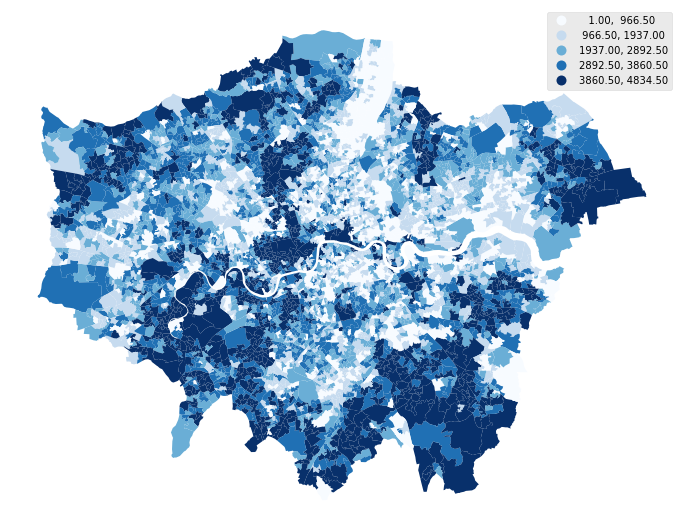

In [55]:
f = plt.figure(dpi = 72)
f.set_size_inches(12,10)

ax1 = f.add_subplot()
deprivation_ranking.plot(column="income2019_rank", legend=True, ax = ax1,cmap="Blues", 
                        scheme="quantiles",
                        aspect=1)
ax1.set_axis_off()

f.subplots_adjust(top=1)
# f.suptitle("Index of multiple deprivation score in London LSOAs (2010)")

plt.axis('off')
plt.show()

## Clean Age variable from census

In [56]:
age21_raw = pd.read_excel("../data/census_2021_migration/Five year age bands.xlsx",sheet_name = "2021")
age11_raw = pd.read_excel("../data/census_2021_migration/Five year age bands.xlsx",sheet_name = "2011")

In [57]:
print(age21_raw.shape)
age21_raw.columns

(4994, 23)


Index(['LSOA code', 'local authority code', 'local authority name', 'All usual residents', 'Aged 4 and under', 'Aged 5 to 9', 'Aged 10 to 14', 'Aged 15 to 19', 'Aged 20 to 24', 'Aged 25 to 29', 'Aged 30 to 34', 'Aged 35 to 39', 'Aged 40 to 44', 'Aged 45 to 49', 'Aged 50 to 54', 'Aged 55 to 59', 'Aged 60 to 64', 'Aged 65 to 69', 'Aged 70 to 74', 'Aged 75 to 79', 'Aged 80 to 84', 'Aged 85 and over', 'average age'], dtype='object')

In [58]:
age21 = age21_raw[['LSOA code','average age']]
age11 = age11_raw[['LSOA code','average age']]

age21 = age21.rename(columns={ 
                    'average age':"average_age_21",
})
age11 = age11.rename(columns={
                    'average age':"average_age_11",
})

In [59]:
cd11to22 = pd.read_csv("../data/QGIS_data/LSOA_(2011)_to_LSOA_(2021)_to_Local_Authority_District_(2022)_Lookup_for_England_and_Wales_(Version_2).csv")

In [60]:
cd11to22 = cd11to22[['LSOA11CD',  'LSOA21CD']]

In [61]:
age21 = age21.merge(cd11to22, left_on="LSOA code", right_on = "LSOA21CD",how="left")
age11 = age11.merge(cd11to22, left_on="LSOA code", right_on = "LSOA21CD",how="left")

**Subsetting London for 2010 and 2019; Get new rankings for each year. Because the deprivation index can only be used to compare in rankings, not absolute scores.**

In [62]:
age = pd.merge(LondonLSOAs, age21, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
age = pd.merge(age, age11, left_on='LSOA11CD', right_on='LSOA11CD', how='left')

In [63]:
age.columns

Index(['LSOA11CD', 'geometry', 'LSOA code_x', 'average_age_21', 'LSOA21CD_x', 'LSOA code_y', 'average_age_11', 'LSOA21CD_y'], dtype='object')

In [64]:
age = age[['LSOA11CD', 'geometry',
           'average_age_21', 
       'average_age_11']]

In [65]:
age.describe()

average_age_21                           average_age_11
count                               4,835.0000                               4,835.0000
mean                                   37.3244                                  35.7432
std                                     3.4765                                   3.7849
min                                    25.7014                                  24.8040
25%                                    34.9761                                  33.1503
50%                                    37.0066                                  35.3679
75%                                    39.4093                                  38.0832
max                                    55.4961                                  54.5560

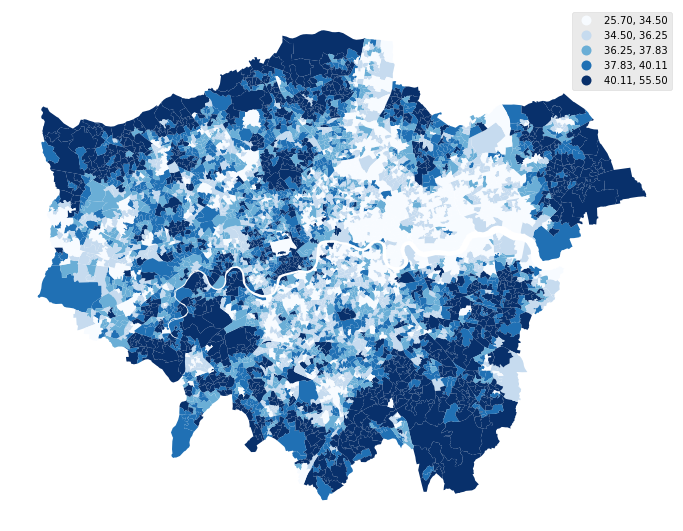

In [70]:
f = plt.figure(dpi = 72)
f.set_size_inches(12,10)

ax1 = f.add_subplot()
age.plot(column="average_age_21", legend=True, ax = ax1,cmap="Blues", 
                        scheme="quantiles",
                        aspect=1)
ax1.set_axis_off()

f.subplots_adjust(top=1)
# f.suptitle("Index of multiple deprivation score in London LSOAs (2010)")

plt.axis('off')
plt.show()

## Car ownerships from census


In [66]:
car11 = pd.read_excel("../data/census_2021_housing/cars or vans (1).xlsx",sheet_name = "2011")
car21 = pd.read_excel("../data/census_2021_housing/cars or vans (1).xlsx",sheet_name = "2021")

In [67]:
car11 = car11.merge(cd11to22, left_on="LSOA code", right_on = "LSOA21CD",how="left")
car21 = car21.merge(cd11to22, left_on="LSOA code", right_on = "LSOA21CD",how="left")

In [68]:
car11["car_percentage11"] = 1 - (car11["none"]/car11["All households "])
car21["car_percentage21"] = 1 - (car21["none"]/car21["All households "])

In [69]:
car11 = car11[['LSOA11CD','LSOA21CD', 'car_percentage11']]
car21 = car21[['LSOA11CD','LSOA21CD', 'car_percentage21']]

In [70]:
car11.shape

(5018, 3)

**Subsetting London for 2010 and 2019; Get new rankings for each year. Because the deprivation index can only be used to compare in rankings, not absolute scores.**

In [71]:
car = pd.merge(LondonLSOAs, car21, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
car = pd.merge(car, car11, left_on='LSOA11CD', right_on='LSOA11CD', how='left')

In [72]:
car.columns

Index(['LSOA11CD', 'geometry', 'LSOA21CD_x', 'car_percentage21', 'LSOA21CD_y', 'car_percentage11'], dtype='object')

In [73]:
car = car[['LSOA11CD', 'geometry', 'car_percentage21', 'car_percentage11']]

In [74]:
car['car_percentage11'] = car['car_percentage11']*100
car['car_percentage21'] = car['car_percentage21']*100

In [75]:
car.describe()

car_percentage21                         car_percentage11
count                               4,835.0000                               4,835.0000
mean                                   60.0595                                  59.9602
std                                    18.8439                                  18.5247
min                                    13.2653                                  13.7450
25%                                    44.5600                                  44.7397
50%                                    61.7550                                  61.3383
75%                                    75.5469                                  75.2993
max                                    96.2185                                  97.3166

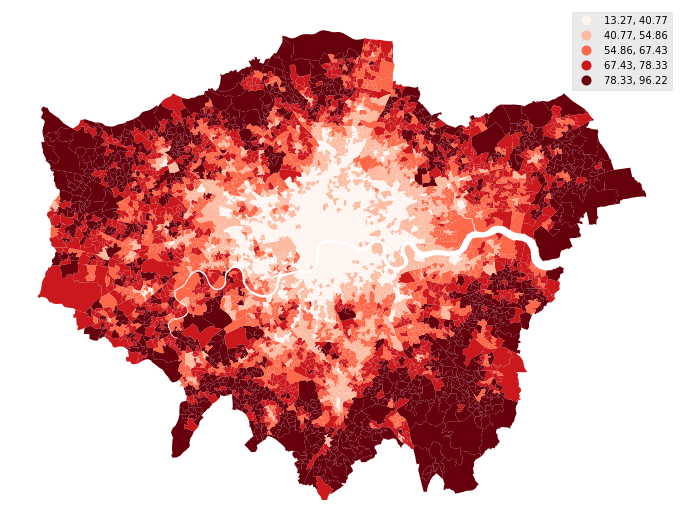

In [76]:
f = plt.figure(dpi = 72)
f.set_size_inches(12,10)

ax1 = f.add_subplot()
car.plot(column="car_percentage21", legend=True, ax = ax1,cmap="Reds", 
                        scheme="quantiles",
                        aspect=1)
ax1.set_axis_off()

f.subplots_adjust(top=1)
# f.suptitle("Index of multiple deprivation score in London LSOAs (2010)")

plt.axis('off')
plt.show()

## Clean PT variable from census

In [70]:
PT21_raw = pd.read_excel("../data/census_2021_labour_market/Method of travel to work.xlsx",sheet_name = "2021")
PT11_raw = pd.read_excel("../data/census_2021_labour_market/Method of travel to work.xlsx",sheet_name = "2011")

In [71]:
print(PT21_raw.shape)
PT21_raw.columns

(4994, 16)


Index(['local authority code', 'local authority name', 'LSOA code', 'All usual residents aged 16+ in work', 'Work mainly at or from home', 'Underground; metro; light rail; tram', 'Train', 'Bus; minibus or coach', 'Taxi', 'Motorcycle; scooter or moped', 'Driving a car or van', 'Passenger in a car or van', 'Bicycle', 'On foot', 'Other method of travel to work', 'travel by PT'], dtype='object')

In [72]:
PT21 = PT21_raw[['LSOA code','travel by PT']]
PT11 = PT11_raw[['LSOA code','travel by PT']]

PT21 = PT21.rename(columns={ 
                    'travel by PT':"PT_percentage21",
})
PT11 = PT11.rename(columns={
                    'travel by PT':"PT_percentage11",
})

In [73]:
PT21 = PT21.merge(cd11to22, left_on="LSOA code", right_on = "LSOA21CD",how="left")
PT11 = PT11.merge(cd11to22, left_on="LSOA code", right_on = "LSOA21CD",how="left")

**Subsetting London for 2010 and 2019; Get new rankings for each year. Because the deprivation index can only be used to compare in rankings, not absolute scores.**

In [74]:
PT = pd.merge(LondonLSOAs, PT21, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
PT = pd.merge(PT, PT11, left_on='LSOA11CD', right_on='LSOA11CD', how='left')

In [75]:
PT.columns

Index(['LSOA11CD', 'geometry', 'LSOA code_x', 'PT_percentage21', 'LSOA21CD_x', 'LSOA code_y', 'PT_percentage11', 'LSOA21CD_y'], dtype='object')

In [76]:
PT = PT[['LSOA11CD', 'geometry', 'PT_percentage21','PT_percentage11',]]

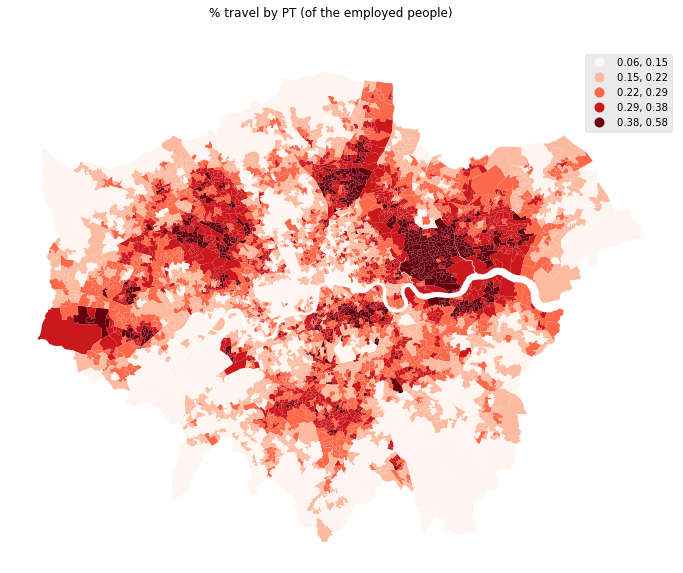

In [77]:
f = plt.figure(dpi = 72)
f.set_size_inches(12,10)

ax1 = f.add_subplot()
PT.plot(column="PT_percentage21", legend=True, ax = ax1,cmap="Reds", 
                        scheme="Natural_Breaks",
                        aspect=1)
ax1.set_axis_off()

f.subplots_adjust(top=1)
f.suptitle("% travel by PT (of the employed people)")

plt.axis('off')
plt.show()

## 2023 (PTAL, Ethnic)

In [77]:
ptal2023_lsoa_raw = gpd.read_file("../analysis/ptal2023JoinToLSOAmean.geojson")

**As the ethnic rate is not correct in this file, we can only use the PTAL columns. And join the correct data into this.**

In [78]:
ptal2023_lsoa_raw.columns

Index(['LSOA11CD', 'All usual residents', 'White British', 'White Irish', 'White Gypsy/Irish Traveller', 'White Roma', 'White Other', 'Mixed White and Asian', 'Mixed White and Black African', 'Mixed White and Black Caribbean', 'Mixed Other', 'Asian Bangladeshi', 'Asian Chinese', 'Asian Indian', 'Asian Pakistani', 'Asian Other', 'Black African', 'Black Caribbean', 'Black Other', 'Other Arab', 'Other Any other', 'white_rate', 'mixed_rate', 'asian_rate', 'black_rate', 'arab_rate', 'other_rate', 'AI_mean', 'LUL_mean', 'BUS_mean', 'RAIL_mean', 'TRAM_mean', 'OA', 'geometry'], dtype='object')

In [79]:
ptal2023_lsoa = ptal2023_lsoa_raw[['LSOA11CD', 'AI_mean','LUL_mean',
       'BUS_mean', 'RAIL_mean', 'TRAM_mean','OA','geometry']]

In [80]:
ptal2023_lsoa

LSOA11CD                                  AI_mean                                 LUL_mean                                 BUS_mean                                RAIL_mean                                TRAM_mean  OA                                           geometry
0     E01000001                                  74.4463                                  31.1011                                  17.0930                                  26.2522                                   0.0000   0  POLYGON ((532105.092 182011.230, 532162.491 18...
1     E01000002                                  84.3425                                  32.6078                                  16.1350                                  35.5996                                   0.0000   1  POLYGON ((532746.813 181786.891, 532671.688 18...
2     E01000003                                  52.9766                                  19.6739                                  10.8104                                  22.4924                                   0.0000   0  POLYGON ((532135.145 182198.119, 532158.250 18...
3     E01000005                                  80.5854                                  30.9879                                  23.6010                                  25.9965                                   0.0000   1  POLYGON ((533807.946 180767.770, 533649.063 18...
4     E01000006                                  24.0275                                   6.8976                                   9.3521                                   7.7778                                   0.0000   1  POLYGON ((545122.049 184314.931, 545271.917 18...
...         ...                                      ...                                      ...                                      ...                                      ...                                      ...  ..                                                ...
4830  E01033742                                   4.3133                                   0.0000                                   3.9360                                   0.3773                                   0.0000   1  POLYGON ((544642.680 179824.674, 544766.313 17...
4831  E01033743                                   3.3677                                   0.0000                                   3.3677                                   0.0000                                   0.0000   1  POLYGON ((546579.195 181097.813, 546687.036 18...
4832  E01033744                                  15.0282                                   0.0000                                  11.3838                                   3.6444                                   0.0000   1  POLYGON ((544536.486 179447.115, 544602.630 17...
4833  E01033745                                   5.7862                                   0.0000                                   5.7862                                   0.0000                                   0.0000   1  POLYGON ((546415.745 180152.270, 546320.715 18...
4834  E01033746                                  22.5679                                   7.7605                                  10.6628                                   4.1446                                   0.0000   0  POLYGON ((538140.000 177313.000, 538129.177 17...

[4835 rows x 8 columns]

In [81]:
ethnic2021_raw = gpd.read_file("../analysis/ethnic_clean/ethnic_2021.geojson")
ethnic2011_raw = gpd.read_file("../analysis/ethnic_clean/ethnic_2011.geojson")

In [82]:
ethnic2021_raw.shape

(4835, 28)

In [83]:
print(ethnic2021_raw.crs, ethnic2021_raw.crs.is_projected)
print(ethnic2011_raw.crs, ethnic2011_raw.crs.is_projected)

epsg:27700 True
epsg:27700 True


In [84]:
ethnic2021_raw.columns

Index(['LSOA11CD', 'All usual residents', 'White British', 'White Irish', 'White Gypsy/Irish Traveller', 'White Roma', 'White Other', 'Mixed White and Asian', 'Mixed White and Black African', 'Mixed White and Black Caribbean', 'Mixed Other', 'Asian Bangladeshi', 'Asian Chinese', 'Asian Indian', 'Asian Pakistani', 'Asian Other', 'Black African', 'Black Caribbean', 'Black Other', 'Other Arab', 'Other Any other', 'white_rate', 'mixed_rate', 'asian_rate', 'black_rate', 'other_rate', 'PopdensePerKm21', 'geometry'], dtype='object')

In [85]:
sum(ethnic2021_raw["All usual residents"])

8576266

In [86]:
ethnic2021 = ethnic2021_raw[['LSOA11CD',
                             'PopdensePerKm21', 
                             'white_rate', 'mixed_rate', 'asian_rate', 'black_rate', 'other_rate']]

In [87]:
ethnic2021['white_rate'] = ethnic2021['white_rate']*100
ethnic2021['mixed_rate'] = ethnic2021['mixed_rate']*100
ethnic2021['asian_rate'] = ethnic2021['asian_rate']*100
ethnic2021['black_rate'] = ethnic2021['black_rate']*100
ethnic2021['other_rate'] = ethnic2021['other_rate']*100

/tmp/ipykernel_2224/420646872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethnic2021['white_rate'] = ethnic2021['white_rate']*100
/tmp/ipykernel_2224/420646872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethnic2021['mixed_rate'] = ethnic2021['mixed_rate']*100
/tmp/ipykernel_2224/420646872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

### Join ethnic 2021 to ptal 2023.

In [88]:
eth21_ptal23 = pd.merge(ptal2023_lsoa, ethnic2021, left_on='LSOA11CD', right_on='LSOA11CD', how='left')

In [89]:
eth21_ptal23.sample(3)

LSOA11CD                                  AI_mean                                 LUL_mean                                 BUS_mean                                RAIL_mean                                TRAM_mean  OA                                           geometry                          PopdensePerKm21                               white_rate                               mixed_rate                               asian_rate                               black_rate                               other_rate
667   E01000682                                   4.7795                                   0.0000                                   4.7795                                   0.0000                                   0.0000   0  POLYGON ((544975.399 164831.470, 545020.211 16...                               5,562.9800                                  75.7196                                   2.6909                                  15.5194                                   3.4418                                   2.6283
4728  E01033150                                   4.3959                                   0.0000                                   4.3959                                   0.0000                                   0.0000   1  POLYGON ((537523.237 198794.089, 537551.308 19...                               9,989.9600                                  33.4713                                   8.6931                                   8.6931                                  37.3152                                  11.8273
3029  E01003096                                  23.5653                                   9.1897                                  12.2506                                   2.1251                                   0.0000   0  POLYGON ((530768.400 176030.768, 530812.992 17...                              14,488.6700                                  69.0148                                   5.9020                                   8.0914                                  13.0890                                   3.9029

In [90]:
eth21_ptal23.columns

Index(['LSOA11CD', 'AI_mean', 'LUL_mean', 'BUS_mean', 'RAIL_mean', 'TRAM_mean', 'OA', 'geometry', 'PopdensePerKm21', 'white_rate', 'mixed_rate', 'asian_rate', 'black_rate', 'other_rate'], dtype='object')

## 2010 (PTAL, Ethnic)

In [91]:
ptal2010_lsoa_raw = gpd.read_file("../data/AI_official/PTAL_2010clean/ptal_lsoa_mean_2010.geojson")
ethnic2011_raw = gpd.read_file("../analysis/ethnic_clean/ethnic_2011.geojson")

In [92]:
ptal2010_lsoa_raw.columns

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM', 'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ', 'Bus_mean', 'LUL_mean', 'NR_mean', 'PTAI_mean', 'geometry'], dtype='object')

In [93]:
ptal2010_lsoa = ptal2010_lsoa_raw[['LSOA11CD', 
                                'PTAI_mean', 'Bus_mean', 'LUL_mean', 'NR_mean','geometry'
                                  ]]

In [94]:
ptal2010_lsoa.shape

(4835, 6)

In [95]:
ethnic2011_raw.columns

Index(['LSOA11CD', 'All usual residents', 'White British', 'White Irish', 'White Gypsy/Irish Traveller', 'White Other', 'Mixed White and Asian', 'Mixed White and Black African', 'Mixed White and Black Caribbean', 'Mixed Other', 'Asian Bangladeshi', 'Asian Chinese', 'Asian Indian', 'Asian Pakistani', 'Asian Other', 'Black African', 'Black Caribbean', 'Black Other', 'Other Arab', 'Other Any other', 'white_rate', 'mixed_rate', 'asian_rate', 'black_rate', 'other_rate', 'PopdensePerKm11', 'geometry'], dtype='object')

In [96]:
ethnic2011 =ethnic2011_raw[['LSOA11CD', 
                            'PopdensePerKm11',
                            'white_rate',
       'mixed_rate', 'asian_rate', 'black_rate', 'other_rate']]

In [97]:
ethnic2011['white_rate'] = ethnic2011['white_rate']*100
ethnic2011['mixed_rate'] = ethnic2011['mixed_rate']*100
ethnic2011['asian_rate'] = ethnic2011['asian_rate']*100
ethnic2011['black_rate'] = ethnic2011['black_rate']*100
ethnic2011['other_rate'] = ethnic2011['other_rate']*100

/tmp/ipykernel_2224/4014388592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethnic2011['white_rate'] = ethnic2011['white_rate']*100
/tmp/ipykernel_2224/4014388592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethnic2011['mixed_rate'] = ethnic2011['mixed_rate']*100
/tmp/ipykernel_2224/4014388592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [98]:
ethnic2011.shape

(4835, 7)

In [99]:
eth11_ptal10 = pd.merge(ptal2010_lsoa, ethnic2011, left_on='LSOA11CD', right_on='LSOA11CD', how='left')

In [100]:
eth11_ptal10.columns

Index(['LSOA11CD', 'PTAI_mean', 'Bus_mean', 'LUL_mean', 'NR_mean', 'geometry', 'PopdensePerKm11', 'white_rate', 'mixed_rate', 'asian_rate', 'black_rate', 'other_rate'], dtype='object')

## Change of access index

In [101]:
print(ptal2023_lsoa.columns)
print(ptal2010_lsoa.columns)

Index(['LSOA11CD', 'AI_mean', 'LUL_mean', 'BUS_mean', 'RAIL_mean', 'TRAM_mean', 'OA', 'geometry'], dtype='object')
Index(['LSOA11CD', 'PTAI_mean', 'Bus_mean', 'LUL_mean', 'NR_mean', 'geometry'], dtype='object')


In [102]:
ptal2023_lsoa = ptal2023_lsoa.rename(columns={ 
                    'AI_mean':"total_access_index23",
                    'LUL_mean':"underground23",
                    'BUS_mean':"bus23", 
                    'RAIL_mean':"rail23", 
                    'TRAM_mean':"tram23",
})
ptal2010_lsoa = ptal2010_lsoa.rename(columns={
                    'PTAI_mean':"total_access_index10",
                    'Bus_mean':"bus10", 
                    'LUL_mean':"underground10",
                    'NR_mean':"rail10", 
})

In [103]:
ptalLSOA_change = pd.merge(ptal2010_lsoa, ptal2023_lsoa.drop("geometry",axis=1), left_on="LSOA11CD", right_on = "LSOA11CD",how="inner")

In [104]:
ptalLSOA_change.columns

Index(['LSOA11CD', 'total_access_index10', 'bus10', 'underground10', 'rail10', 'geometry', 'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23', 'OA'], dtype='object')

In [105]:
ptalLSOA_change["AI_total_change"] = (ptalLSOA_change["total_access_index23"] - ptalLSOA_change["total_access_index10"])
ptalLSOA_change["AI_bus_change"] = (ptalLSOA_change["bus23"] - ptalLSOA_change["bus10"])
ptalLSOA_change["AI_rail_change"] = (ptalLSOA_change["rail23"] - ptalLSOA_change["rail10"])
ptalLSOA_change["AI_underground_change"] = (ptalLSOA_change["underground23"] - ptalLSOA_change["underground10"])

ptalLSOA_change["AI_tram_change"] = ptalLSOA_change["tram23"]


In [106]:
ptalLSOA_change.columns

Index(['LSOA11CD', 'total_access_index10', 'bus10', 'underground10', 'rail10', 'geometry', 'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23', 'OA', 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change'], dtype='object')

# regression models

## prepare for 2021 regression model.

In [107]:
eth11_ptal10.columns

Index(['LSOA11CD', 'PTAI_mean', 'Bus_mean', 'LUL_mean', 'NR_mean', 'geometry', 'PopdensePerKm11', 'white_rate', 'mixed_rate', 'asian_rate', 'black_rate', 'other_rate'], dtype='object')

In [108]:
eth11_ptal10 = eth11_ptal10.rename(columns={ 
                    'white_rate':"white_rate11",
                    'mixed_rate':"mixed_rate11",
                    'asian_rate':"asian_rate11",
                    'black_rate':"black_rate11",
                    'other_rate':"other_rate11"

})

In [109]:
eth11 = eth11_ptal10[['LSOA11CD',
                      'PopdensePerKm11',
                      'white_rate11', 'mixed_rate11', 'asian_rate11', 'black_rate11', 'other_rate11']]

In [110]:
eth21_ptal23.columns

Index(['LSOA11CD', 'AI_mean', 'LUL_mean', 'BUS_mean', 'RAIL_mean', 'TRAM_mean', 'OA', 'geometry', 'PopdensePerKm21', 'white_rate', 'mixed_rate', 'asian_rate', 'black_rate', 'other_rate'], dtype='object')

In [111]:
eth21_ptal23 = eth21_ptal23.rename(columns={ 
                    'white_rate':"white_rate21",
                    'mixed_rate':"mixed_rate21",
                    'asian_rate':"asian_rate21",
                    'black_rate':"black_rate21",
                    'other_rate':"other_rate21"

})

In [112]:
eth21 = eth21_ptal23[['LSOA11CD',
                      'PopdensePerKm21',
                      'white_rate21', 'mixed_rate21', 'asian_rate21', 'black_rate21', 'other_rate21']]

In [113]:
eth21.describe()

PopdensePerKm21                             white_rate21                             mixed_rate21                             asian_rate21                             black_rate21                             other_rate21
count                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000
mean                               10,002.3436                                  55.1498                                   5.7394                                  19.6633                                  13.1972                                   6.2503
std                                 6,423.8523                                  18.7537                                   2.0277                                  16.0551                                  10.7040                                   3.9942
min                                   119.3700                                   1.9449                                   0.6839                                   0.6517                                   0.0000                                   0.0000
25%                                 5,413.4750                                  41.4671                                   4.2716                                   8.6633                                   5.0981                                   3.4444
50%                                 8,773.5200                                  56.7043                                   5.7159                                  13.8824                                   9.8679                                   5.2347
75%                                13,377.4550                                  70.1252                                   7.0834                                  24.1773                                  18.4892                                   8.1258
max                                70,389.8100                                  96.6232                                  18.5133                                  87.8843                                  60.6033                                  35.1351

In [114]:
age.columns

Index(['LSOA11CD', 'geometry', 'average_age_21', 'average_age_11'], dtype='object')

In [115]:
deprivation_ranking.columns

Index(['LSOA11CD', 'geometry', 'income2010_rank', 'income2019_rank'], dtype='object')

In [116]:
car.columns

Index(['LSOA11CD', 'geometry', 'car_percentage21', 'car_percentage11'], dtype='object')

In [117]:
PT.columns

NameError: name 'PT' is not defined

In [118]:
mul_var = pd.merge(age, eth11, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
mul_var = pd.merge(mul_var, eth21, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
mul_var = pd.merge(mul_var, deprivation_ranking.drop("geometry",axis = 1), left_on='LSOA11CD', right_on='LSOA11CD', how='left')
mul_var = pd.merge(mul_var, car.drop("geometry",axis=1), left_on='LSOA11CD', right_on='LSOA11CD', how='left')
# mul_var = pd.merge(mul_var, PT.drop("geometry",axis=1), left_on='LSOA11CD', right_on='LSOA11CD', how='left')

mul_var = pd.merge(mul_var, ptalLSOA_change.drop("geometry",axis=1), left_on='LSOA11CD', right_on='LSOA11CD', how='left')

In [119]:
mul_var.columns

Index(['LSOA11CD', 'geometry', 'average_age_21', 'average_age_11', 'PopdensePerKm11', 'white_rate11', 'mixed_rate11', 'asian_rate11', 'black_rate11', 'other_rate11', 'PopdensePerKm21', 'white_rate21', 'mixed_rate21', 'asian_rate21', 'black_rate21', 'other_rate21', 'income2010_rank', 'income2019_rank', 'car_percentage21', 'car_percentage11', 'total_access_index10', 'bus10', 'underground10', 'rail10', 'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23', 'OA', 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change'], dtype='object')

In [120]:
mul_var.loc[mul_var['LSOA11CD'] == "E01033729"]

LSOA11CD                                           geometry                           average_age_21                           average_age_11                          PopdensePerKm11                             white_rate11                             mixed_rate11                             asian_rate11                             black_rate11                             other_rate11                          PopdensePerKm21                             white_rate21                             mixed_rate21                             asian_rate21                             black_rate21                             other_rate21                          income2010_rank                          income2019_rank                         car_percentage21                         car_percentage11                     total_access_index10                                    bus10                            underground10                                   rail10  \
4817  E01033729  POLYGON ((544740.000 174530.000, 544866.331 17...                                  32.8084                                  29.4486                               4,294.5100                                  76.6925                                   4.7154                                   9.5992                                   8.0162                                   0.9768                               3,594.4300                                  66.3179                                   5.0704                                   8.9336                                  15.6539                                   4.0241                               4,823.5000                               1,804.5000                                  59.4452                                  54.2394                                   4.3193                                   4.2629                                   0.0000                                   0.0564   

                         total_access_index23                            underground23                                    bus23                                   rail23                                   tram23  OA                          AI_total_change                            AI_bus_change                           AI_rail_change                    AI_underground_change                           AI_tram_change  
4817                                   4.3763                                   0.0000                                   4.3763                                   0.0000                                   0.0000   0                                   0.0570                                   0.1134                                  -0.0564                                   0.0000                                   0.0000

In [121]:
reg_df = mul_var[
[
'LSOA11CD', 'geometry',
# 2011 data
'total_access_index10', 'bus10', 'underground10', 'rail10',
'white_rate11', 'mixed_rate11','asian_rate11', 'black_rate11', 'other_rate11', 
'income2010_rank','average_age_11', 
'PopdensePerKm11','car_percentage11', 
# 2021 data
'total_access_index23', 'underground23', 'bus23','rail23', 'tram23',
'white_rate21', 'mixed_rate21', 'asian_rate21','black_rate21', 'other_rate21', 
'income2019_rank', 'average_age_21',
'PopdensePerKm21', 'car_percentage21',
# change from 2011 to 2021
'AI_total_change', 'AI_bus_change','AI_rail_change', 'AI_underground_change', 'AI_tram_change',
# location 
    'OA'
]]

## check for regression analysis

### Convert rankings into 4 quantiles.

In [122]:
reg_df.shape

(4835, 35)

In [123]:
reg_df.loc[reg_df['LSOA11CD'] == "E01033729"]

LSOA11CD                                           geometry                     total_access_index10                                    bus10                            underground10                                   rail10                             white_rate11                             mixed_rate11                             asian_rate11                             black_rate11                             other_rate11                          income2010_rank                           average_age_11                          PopdensePerKm11                         car_percentage11                     total_access_index23                            underground23                                    bus23                                   rail23                                   tram23                             white_rate21                             mixed_rate21                             asian_rate21                             black_rate21  \
4817  E01033729  POLYGON ((544740.000 174530.000, 544866.331 17...                                   4.3193                                   4.2629                                   0.0000                                   0.0564                                  76.6925                                   4.7154                                   9.5992                                   8.0162                                   0.9768                               4,823.5000                                  29.4486                               4,294.5100                                  54.2394                                   4.3763                                   0.0000                                   4.3763                                   0.0000                                   0.0000                                  66.3179                                   5.0704                                   8.9336                                  15.6539   

                                 other_rate21                          income2019_rank                           average_age_21                          PopdensePerKm21                         car_percentage21                          AI_total_change                            AI_bus_change                           AI_rail_change                    AI_underground_change                           AI_tram_change  OA  
4817                                   4.0241                               1,804.5000                                  32.8084                               3,594.4300                                  59.4452                                   0.0570                                   0.1134                                  -0.0564                                   0.0000                                   0.0000   0

In [124]:
reg_df.income2010_rank.isna().sum()

0

In [125]:
reg_df.income2010_rank.describe()

count                                 4,835.0000
mean                                  2,418.0000
std                                   1,395.3447
min                                       1.0000
25%                                   1,191.0000
50%                                   2,451.0000
75%                                   3,692.0000
max                                   4,823.5000
Name: income2010_rank, dtype: float64

In [126]:
reg_df.income2019_rank.describe()

count                                 4,835.0000
mean                                  2,418.0000
std                                   1,395.8757
min                                       1.0000
25%                                   1,201.5000
50%                                   2,430.0000
75%                                   3,621.5000
max                                   4,834.5000
Name: income2019_rank, dtype: float64

In [127]:
#income
conditions = [
    (reg_df['income2010_rank'] <= 1191),
    (reg_df['income2010_rank'] > 1191) & (reg_df['income2010_rank'] <= 2451),
    (reg_df['income2010_rank'] > 2451) & (reg_df['income2010_rank'] <= 3692),
    (reg_df['income2010_rank'] > 3692)
    ]

values = ['incomeQ1_2010', 'incomeQ2_2010', 'incomeQ3_2010', 'incomeQ4_2010']

reg_df['income_quartiles10'] = np.select(conditions, values)

#education
# conditions = [
#     (reg_df['education2010_rank'] <= 1213),
#     (reg_df['education2010_rank'] > 1213) & (reg_df['education2010_rank'] <= 2426),
#     (reg_df['education2010_rank'] > 2426) & (reg_df['education2010_rank'] <= 3636),
#     (reg_df['education2010_rank'] > 3636)
#     ]

# values = ['eduQ1_2010', 'eduQ2_2010', 'eduQ3_2010', 'eduQ4_2010']

# reg_df['edu_quartiles10'] = np.select(conditions, values)

conditions = [
    (reg_df['income2019_rank'] <= 1201),
    (reg_df['income2019_rank'] > 1201) & (reg_df['income2019_rank'] <= 2430),
    (reg_df['income2019_rank'] > 2430) & (reg_df['income2019_rank'] <= 3621),
    (reg_df['income2019_rank'] > 3621)
    ]

values = ['incomeQ1_2019', 'incomeQ2_2019', 'incomeQ3_2019', 'incomeQ4_2019']

reg_df['income_quartiles19'] = np.select(conditions, values)

reg_df.head()

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


LSOA11CD                                           geometry                     total_access_index10                                    bus10                            underground10                                   rail10                             white_rate11                             mixed_rate11                             asian_rate11                             black_rate11                             other_rate11                          income2010_rank                           average_age_11                          PopdensePerKm11                         car_percentage11                     total_access_index23                            underground23                                    bus23                                   rail23                                   tram23                             white_rate21                             mixed_rate21                             asian_rate21                             black_rate21  \
0  E01000001  POLYGON ((532105.092 182011.230, 532162.491 18...                                  50.9638                                  14.0946                                  26.5615                                  10.3077                                  84.5051                                   3.6860                                   8.7372                                   0.7509                                   2.3208                               4,823.5000                                  45.5222                              10,984.4900                                  40.7534                                  74.4463                                  31.1011                                  17.0930                                  26.2522                                   0.0000                                  80.2444                                   3.6660                                  10.7264                                   0.7468   
1  E01000002  POLYGON ((532746.813 181786.891, 532671.688 18...                                  55.5735                                  16.6720                                  25.5090                                  13.3925                                  88.7187                                   3.7604                                   6.6156                                   0.2786                                   0.6267                               4,823.5000                                  45.3426                               6,346.2800                                  42.0482                                  84.3425                                  32.6078                                  16.1350                                  35.5996                                   0.0000                                  78.3960                                   4.3353                                  13.0780                                   0.6503   
2  E01000003  POLYGON ((532135.145 182198.119, 532158.250 18...                                  28.3517                                   9.6067                                  11.0083                                   7.7367                                  78.3804                                   4.0862                                  12.4814                                   3.3432                                   1.7088                               4,026.0000                                  43.1813                              23,480.5400                                  19.8286                                  52.9766                                  19.6739                                  10.8104                                  22.4924                                   0.0000                                  74.1294                                   6.2189                                   9.3905                                   3.4204   
3  E01000005  POLYGON ((533807.946 180767.770, 533649.063 18...                                  62.1861                        

In [128]:
reg_df.columns

Index(['LSOA11CD', 'geometry', 'total_access_index10', 'bus10', 'underground10', 'rail10', 'white_rate11', 'mixed_rate11', 'asian_rate11', 'black_rate11', 'other_rate11', 'income2010_rank', 'average_age_11', 'PopdensePerKm11', 'car_percentage11', 'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23', 'white_rate21', 'mixed_rate21', 'asian_rate21', 'black_rate21', 'other_rate21', 'income2019_rank', 'average_age_21', 'PopdensePerKm21', 'car_percentage21', 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change', 'OA', 'income_quartiles10', 'income_quartiles19'], dtype='object')

### Divide into inner and outer London

In [129]:
inner = gpd.read_file("../data/QGIS_data/shapefile/innerlondonLSOAs.geojson")

In [130]:
inner = inner[['LSOA11CD']]
inner["location"] = "inner"

In [131]:
inner.head()

LSOA11CD location
0  E01003013    inner
1  E01003014    inner
2  E01003015    inner
3  E01003016    inner
4  E01003017    inner

In [132]:
reg_df = reg_df.merge(inner, left_on="LSOA11CD", right_on = "LSOA11CD",how="left")

In [133]:
reg_df['location'] = reg_df["location"]. fillna('outer')

In [134]:
reg_df.location.isna().sum()

0

In [135]:
reg_df['OA'] = reg_df['OA'].apply(str)

In [136]:
reg_df.head()

LSOA11CD                                           geometry                     total_access_index10                                    bus10                            underground10                                   rail10                             white_rate11                             mixed_rate11                             asian_rate11                             black_rate11                             other_rate11                          income2010_rank                           average_age_11                          PopdensePerKm11                         car_percentage11                     total_access_index23                            underground23                                    bus23                                   rail23                                   tram23                             white_rate21                             mixed_rate21                             asian_rate21                             black_rate21  \
0  E01000001  POLYGON ((532105.092 182011.230, 532162.491 18...                                  50.9638                                  14.0946                                  26.5615                                  10.3077                                  84.5051                                   3.6860                                   8.7372                                   0.7509                                   2.3208                               4,823.5000                                  45.5222                              10,984.4900                                  40.7534                                  74.4463                                  31.1011                                  17.0930                                  26.2522                                   0.0000                                  80.2444                                   3.6660                                  10.7264                                   0.7468   
1  E01000002  POLYGON ((532746.813 181786.891, 532671.688 18...                                  55.5735                                  16.6720                                  25.5090                                  13.3925                                  88.7187                                   3.7604                                   6.6156                                   0.2786                                   0.6267                               4,823.5000                                  45.3426                               6,346.2800                                  42.0482                                  84.3425                                  32.6078                                  16.1350                                  35.5996                                   0.0000                                  78.3960                                   4.3353                                  13.0780                                   0.6503   
2  E01000003  POLYGON ((532135.145 182198.119, 532158.250 18...                                  28.3517                                   9.6067                                  11.0083                                   7.7367                                  78.3804                                   4.0862                                  12.4814                                   3.3432                                   1.7088                               4,026.0000                                  43.1813                              23,480.5400                                  19.8286                                  52.9766                                  19.6739                                  10.8104                                  22.4924                                   0.0000                                  74.1294                                   6.2189                                   9.3905                                   3.4204   
3  E01000005  POLYGON ((533807.946 180767.770, 533649.063 18...                                  62.1861                        

In [137]:
reg_df['location'].value_counts()['outer']

2934

In [138]:
reg_df = pd.get_dummies(reg_df,columns = ['income_quartiles10', 'income_quartiles19','OA','location'])

In [139]:
reg_df.columns

Index(['LSOA11CD', 'geometry', 'total_access_index10', 'bus10', 'underground10', 'rail10', 'white_rate11', 'mixed_rate11', 'asian_rate11', 'black_rate11', 'other_rate11', 'income2010_rank', 'average_age_11', 'PopdensePerKm11', 'car_percentage11', 'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23', 'white_rate21', 'mixed_rate21', 'asian_rate21', 'black_rate21', 'other_rate21', 'income2019_rank', 'average_age_21', 'PopdensePerKm21', 'car_percentage21', 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change', 'income_quartiles10_incomeQ1_2010', 'income_quartiles10_incomeQ2_2010', 'income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010', 'income_quartiles19_incomeQ1_2019', 'income_quartiles19_incomeQ2_2019', 'income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019', 'OA_0', 'OA_1', 'location_inner', 'location_outer'], dtype='object')

In [140]:
reg_df = reg_df[[

'LSOA11CD', 'geometry',
# 2011 data
'total_access_index10', 'bus10', 'underground10', 'rail10',
'white_rate11', 'mixed_rate11','asian_rate11', 'black_rate11', 'other_rate11', 
'income_quartiles10_incomeQ1_2010', 'income_quartiles10_incomeQ2_2010',
'income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010',
'average_age_11', 
'PopdensePerKm11','car_percentage11', 
    
# 2021 data
'total_access_index23', 'underground23', 'bus23','rail23', 'tram23',
'white_rate21', 'mixed_rate21', 'asian_rate21','black_rate21', 'other_rate21', 
'income_quartiles19_incomeQ1_2019', 'income_quartiles19_incomeQ2_2019',
'income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019',
'average_age_21',
'PopdensePerKm21', 'car_percentage21',
    
# change from 2011 to 2021
'AI_total_change', 'AI_bus_change','AI_rail_change', 'AI_underground_change', 'AI_tram_change',
# location 
'OA_0', 'OA_1',
'location_inner', 'location_outer'
]]

In [141]:
reg_df.dtypes

LSOA11CD                              object
geometry                            geometry
total_access_index10                 float64
bus10                                float64
underground10                        float64
rail10                               float64
white_rate11                         float64
mixed_rate11                         float64
asian_rate11                         float64
black_rate11                         float64
other_rate11                         float64
income_quartiles10_incomeQ1_2010       uint8
income_quartiles10_incomeQ2_2010       uint8
income_quartiles10_incomeQ3_2010       uint8
income_quartiles10_incomeQ4_2010       uint8
average_age_11                       float64
PopdensePerKm11                      float64
car_percentage11                     float64
total_access_index23                 float64
underground23                        float64
bus23                                float64
rail23                               float64
tram23    

In [142]:
reg_df.columns

Index(['LSOA11CD', 'geometry', 'total_access_index10', 'bus10', 'underground10', 'rail10', 'white_rate11', 'mixed_rate11', 'asian_rate11', 'black_rate11', 'other_rate11', 'income_quartiles10_incomeQ1_2010', 'income_quartiles10_incomeQ2_2010', 'income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010', 'average_age_11', 'PopdensePerKm11', 'car_percentage11', 'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23', 'white_rate21', 'mixed_rate21', 'asian_rate21', 'black_rate21', 'other_rate21', 'income_quartiles19_incomeQ1_2019', 'income_quartiles19_incomeQ2_2019', 'income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019', 'average_age_21', 'PopdensePerKm21', 'car_percentage21', 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change', 'OA_0', 'OA_1', 'location_inner', 'location_outer'], dtype='object')

In [143]:
reg_df.describe()

total_access_index10                                    bus10                            underground10                                   rail10                             white_rate11                             mixed_rate11                             asian_rate11                             black_rate11                             other_rate11         income_quartiles10_incomeQ1_2010         income_quartiles10_incomeQ2_2010         income_quartiles10_incomeQ3_2010         income_quartiles10_incomeQ4_2010                           average_age_11                          PopdensePerKm11                         car_percentage11                     total_access_index23                            underground23                                    bus23                                   rail23                                   tram23                             white_rate21                             mixed_rate21                             asian_rate21  \
count                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000   
mean                                   11.3852                                   7.6179                                   2.2252                                   1.5428                                  60.6944                                   4.9246                                  17.9359                                  13.0663                                   3.3788                                   0.2571                                   0.2641                                   0.2600                                   0.2188                                  35.7432                               9,647.6264                                  59.9602                                  13.2364                                   2.9774                                   8.2445                                   1.9393                                   0.0751                                  55.1498                                   5.7394                                  19.6633   
std                                     9.8192                                   5.3559                                   4.1752                                   2.8307                                  20.3689                                   1.9479                                  16.1667                                  11.2133                                   2.8205                                   0.4371                                   0.4409                                   0.4387                                   0.4135                                   3.7849                               6,652.1812                                  18.5247                                  11.6486                                   5.6152                                   5.1791                                   3.7180                                   0.5124                                  18.7537                                   2.0277                                  16.0551   
min                                     0.0953        

In [144]:
# plt.figure(figsize=(5,5),dpi = 8)
# sns.pairplot(reg_scaled,markers="+",kind="reg",plot_kws={'line_kws':{'color':'black'}},corner=False)
# plt.savefig("output.png",dpi = 300)

In [736]:
# size = 10
# plt.scatter(model.fittedvalues, model.resid , size)
# plt.xlabel('Fitted  model')
# plt.ylabel('Residual')
# plt.title('Residual vs. Fitted  model')
# plt.show()

In [737]:
# QQ-Plot of residuals
# sm.qqplot(model.resid,fit=True,line='45')
# plt.show()

In [747]:
plt.figure(figsize=(10,8),dpi = 72)
sns.heatmap(model_change2.corr(method='spearman'), # plot a correlation matrix 
            annot=False, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='RdBu_r') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)
plt.title('Spearman Correlation Matrix') # add a title
# plt.savefig('correlation_matrix_2021.png')

NameError: name 'model_change2' is not defined

<Figure size 720x576 with 0 Axes>

## OLS regression.

In [748]:
# sns.displot(data=df_scaled,  kde=True,height=2,aspect=5)

In [149]:
reg_scaled = reg_df[[

# 'LSOA11CD', 'geometry',
# 2011 data
# 'total_access_index10',
    # 'bus10', 'underground10', 'rail10',
    'AI_total_change', 
'white_rate11',
    'mixed_rate11','asian_rate11', 'black_rate11', 'other_rate11', 
'income_quartiles10_incomeQ1_2010', 
    'income_quartiles10_incomeQ2_2010',
'income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010',
'average_age_11', 
'PopdensePerKm11',
    'car_percentage11', 
    
# 2021 data
# 'total_access_index23', 'underground23', 'bus23','rail23', 'tram23',
# 'white_rate21', 'mixed_rate21', 'asian_rate21','black_rate21', 'other_rate21', 
# 'income_quartiles19_incomeQ1_2019', 'income_quartiles19_incomeQ2_2019',
# 'income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019',
# 'average_age_21',
# 'PopdensePerKm21', 'car_percentage21',
    
# change from 2011 to 2021

    # 'AI_bus_change','AI_rail_change', 'AI_underground_change', 'AI_tram_change',
# location 
# 'OA_0',
    'OA_1',
# 'location_inner', 
    'location_outer'
]]

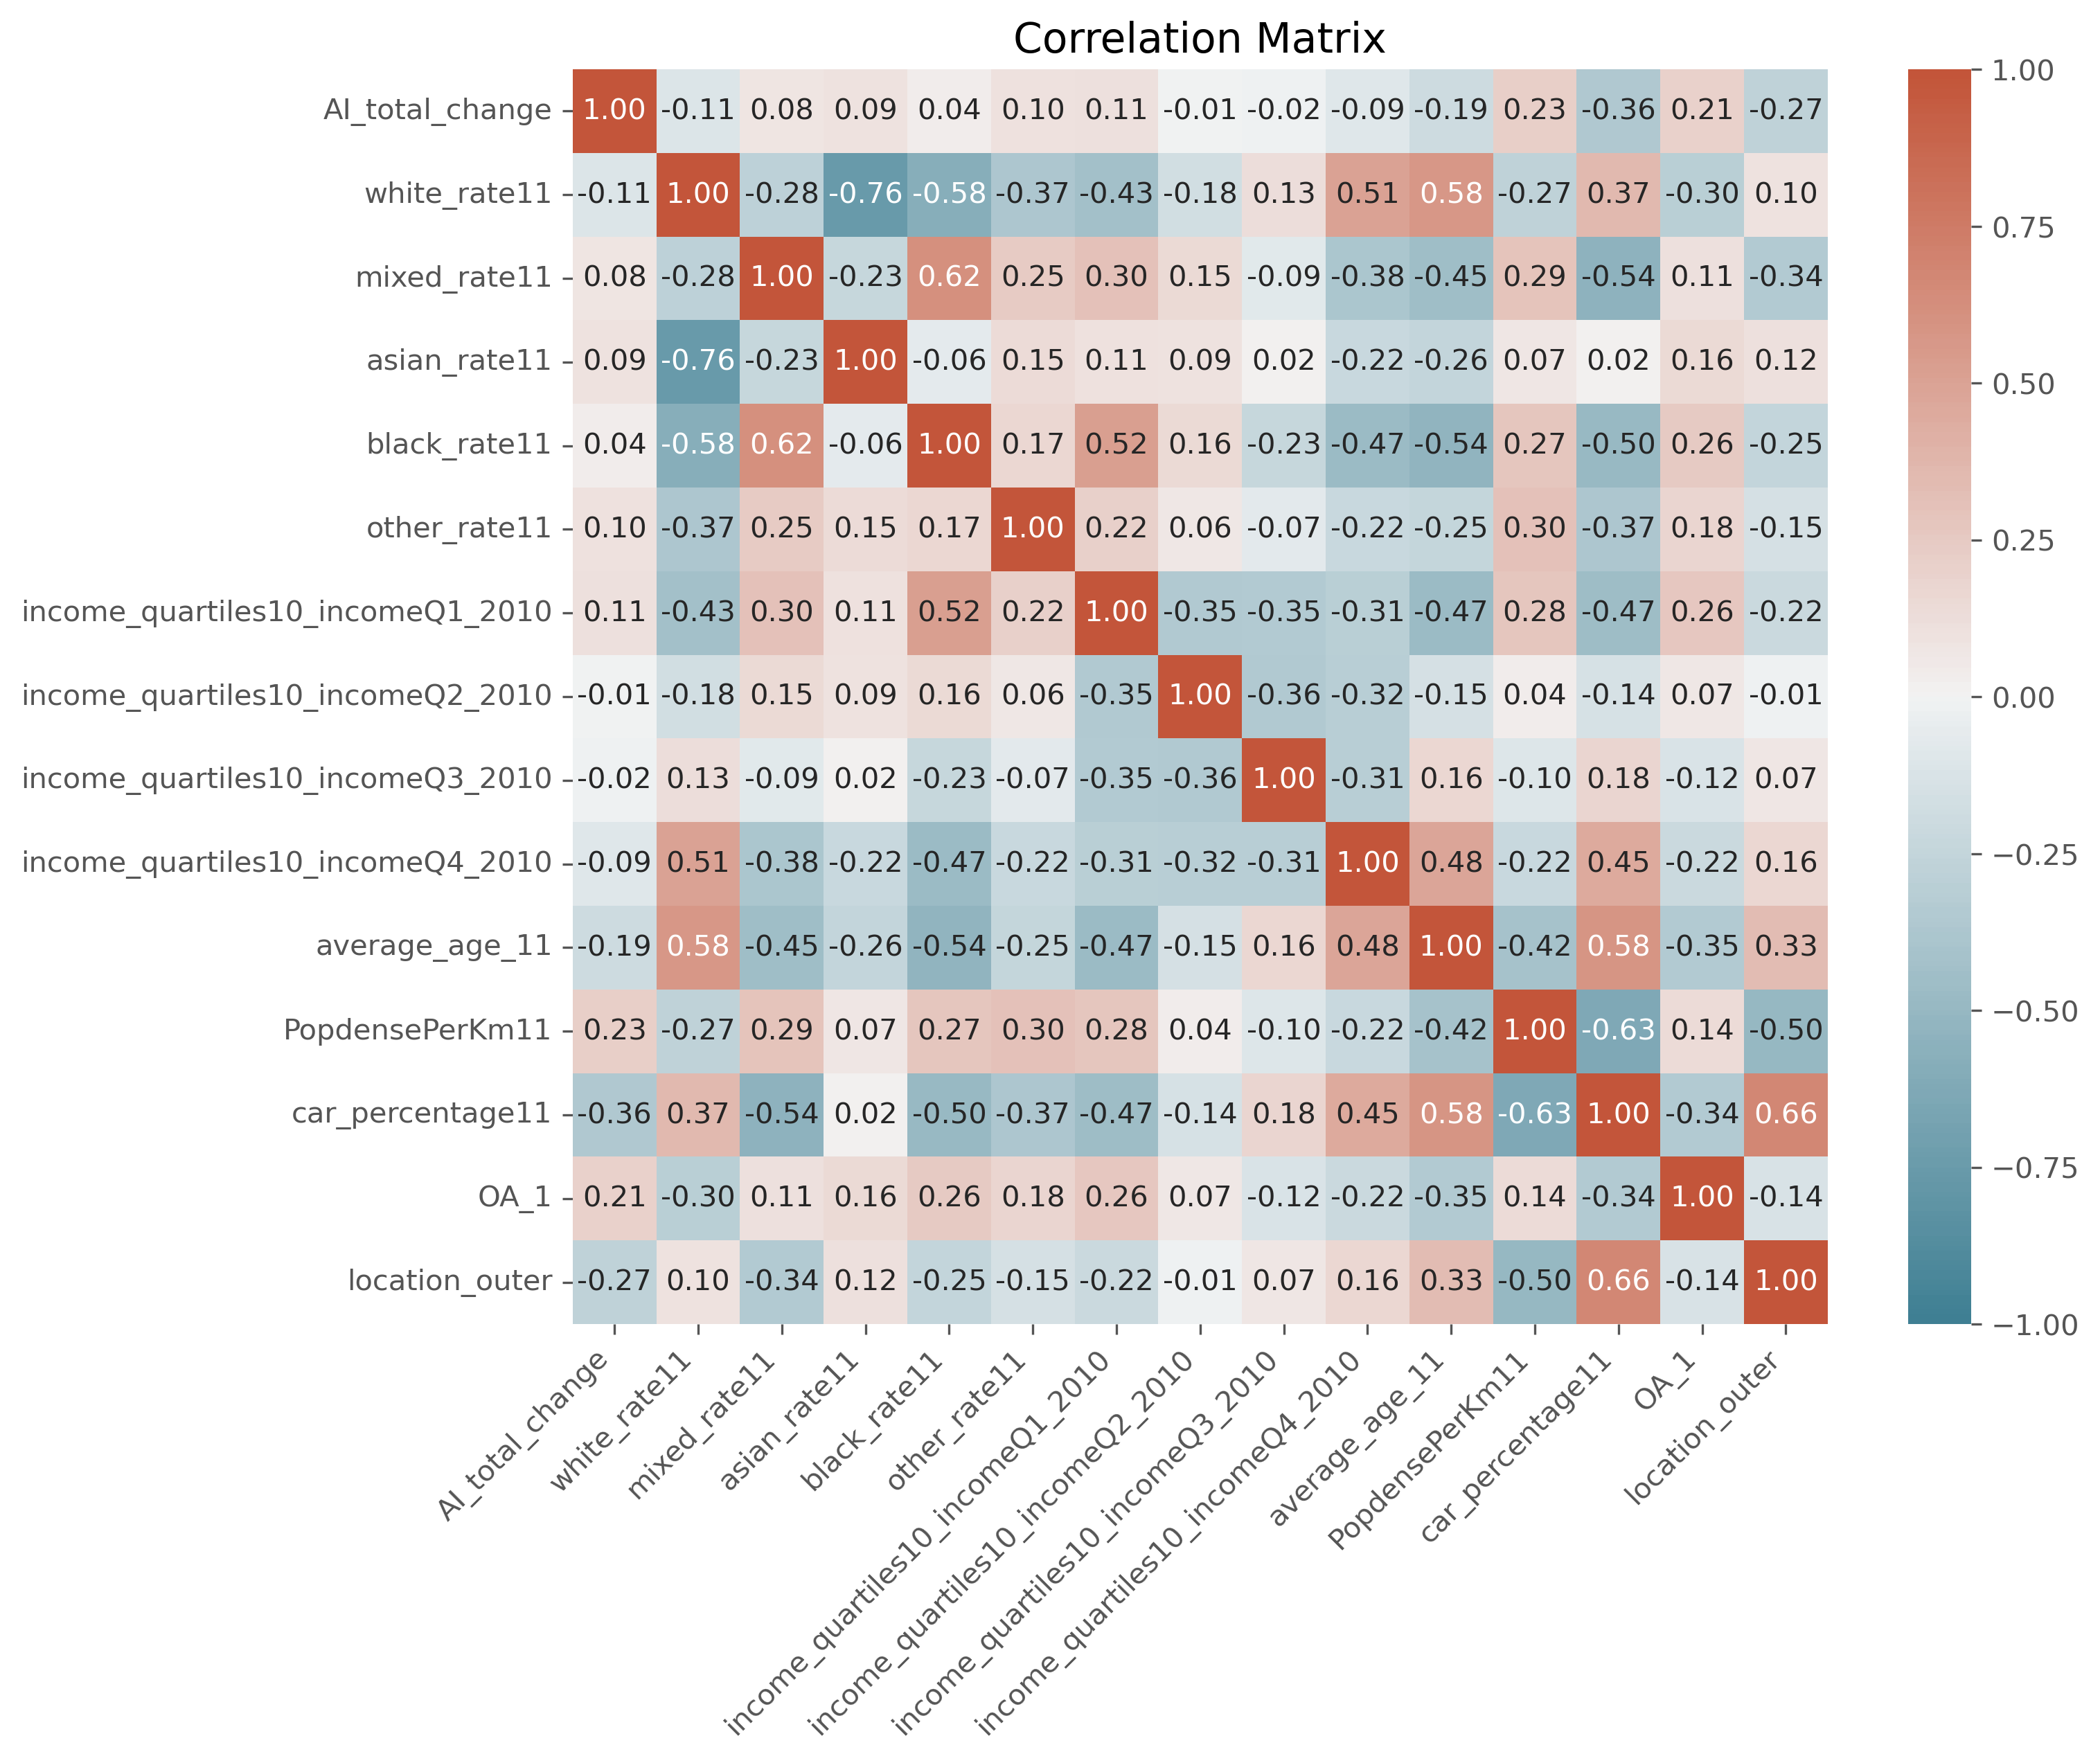

In [151]:
plt.figure(figsize=(10,8),dpi=300)
ax = sns.heatmap(reg_scaled.corr(), # plot a correlation matrix 
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True) # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Matrix') # add a title

plt.savefig("viz/correlation_matrix_change.png",dpi = 300)

In [152]:
response = "AI_total_change"

In [153]:
#Using VIF to deal with multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    while True:
        df_with_const = add_constant(df)
        
        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
        
        vif_df = vif_df.drop('const')
        
        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break

    return df

In [154]:
df_predictors_selected_VIF = drop_column_using_vif_(reg_scaled.drop(response, axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

/opt/conda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: white_rate11


/opt/conda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: income_quartiles10_incomeQ1_2010
The columns remaining after VIF selection are:
Index(['mixed_rate11', 'asian_rate11', 'black_rate11', 'other_rate11', 'income_quartiles10_incomeQ2_2010', 'income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010', 'average_age_11', 'PopdensePerKm11', 'car_percentage11', 'OA_1', 'location_outer'], dtype='object')


In [155]:
model = sm.OLS(endog=reg_scaled[[response]], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        AI_total_change   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     93.42
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          2.19e-208
Time:                        11:33:32   Log-Likelihood:                -12616.
No. Observations:                4835   AIC:                         2.526e+04
Df Residuals:                    4822   BIC:                         2.534e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                8.5849      0.797     10.772      0.000       7.023      10.147
mixed_rate11                        -0.0878      0.036     -2.457      0.014      -0.158      -0.018
asian_rate11                         0.0223      0.004      6.293      0.000       0.015       0.029
black_rate11                        -0.0393      0.007     -5.959      0.000      -0.052      -0.026
other_rate11                        -0.0656      0.019     -3.489      0.000      -0.103      -0.029
income_quartiles10_incomeQ2_2010     0.0508      0.142      0.357      0.721      -0.228       0.330
income_quartiles10_incomeQ3_2010     0.7334      0.172      4.263      0.000       0.396       1.071
income_quartiles10_incomeQ4_2010     1.0920      0.216      5.052      0.000       0.668       1.516
average_age_11                      -0.0107      0.019     -0.573      0.566      -0.047       0.026
PopdensePerKm11                  -1.634e-05   9.54e-06     -1.713      0.087    -3.5e-05    2.36e-06
car_percentage11                    -0.0986      0.005    -18.916      0.000      -0.109      -0.088
OA_1                                 0.9521      0.137      6.930      0.000       0.683       1.221
location_outer                      -0.2152      0.138     -1.559      0.119      -0.486       0.055
==============================================================================
Omnibus:                     2965.014   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57230.940
Skew:                           2.577   Prob(JB):                         0.00
Kurtosis:                      19.047   Cond. No.                     1.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---------

### mapping the residuals

In [755]:
residual_map["resid"] = m0.u

NameError: name 'residual_map' is not defined

In [ ]:
residual_map

In [ ]:
f = plt.figure(dpi = 72)
f.set_size_inches(12,10)

ax1 = f.add_subplot()
# residual_map.plot(column='resid', legend=True, cmap='viridis',  ax=ax1,scheme="Natural_Breaks")

residual_map.plot(column='resid', cmap='RdBu_r', scheme="User_Defined", 
         legend=True, classification_kwds=dict(bins=[-2,-1,0,1,2]),
         ax=ax1)
ax1.set_axis_off()

f.subplots_adjust(top=1)
f.suptitle("residual map of 2021 OLS regression")

## Spatial lag models

$$ P_i = \alpha + \lambda \sum_j w_{ij} P_i + \beta X_i + \epsilon_i $$

In [156]:
from pysal.model import spreg
from pysal.lib import weights

In [157]:
reg_df.columns

Index(['LSOA11CD', 'geometry', 'total_access_index10', 'bus10', 'underground10', 'rail10', 'white_rate11', 'mixed_rate11', 'asian_rate11', 'black_rate11', 'other_rate11', 'income_quartiles10_incomeQ1_2010', 'income_quartiles10_incomeQ2_2010', 'income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010', 'average_age_11', 'PopdensePerKm11', 'car_percentage11', 'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23', 'white_rate21', 'mixed_rate21', 'asian_rate21', 'black_rate21', 'other_rate21', 'income_quartiles19_incomeQ1_2019', 'income_quartiles19_incomeQ2_2019', 'income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019', 'average_age_21', 'PopdensePerKm21', 'car_percentage21', 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change', 'OA_0', 'OA_1', 'location_inner', 'location_outer'], dtype='object')

In [158]:
data = reg_df.copy()

In [159]:
data.shape

(4835, 44)

In [160]:
data.isna().sum()

LSOA11CD                            0
geometry                            0
total_access_index10                0
bus10                               0
underground10                       0
rail10                              0
white_rate11                        0
mixed_rate11                        0
asian_rate11                        0
black_rate11                        0
other_rate11                        0
income_quartiles10_incomeQ1_2010    0
income_quartiles10_incomeQ2_2010    0
income_quartiles10_incomeQ3_2010    0
income_quartiles10_incomeQ4_2010    0
average_age_11                      0
PopdensePerKm11                     0
car_percentage11                    0
total_access_index23                0
underground23                       0
bus23                               0
rail23                              0
tram23                              0
white_rate21                        0
mixed_rate21                        0
asian_rate21                        0
black_rate21

In [161]:
len(list(data.geometry.unique()))

4835

In [162]:
w = weights.KNN.from_dataframe(data, k=8)
w.transform = 'R'
w


In [163]:
w.neighbors[0]

[1, 2, 4750, 4675, 4749, 2644, 4674, 2662]

In [164]:
data.columns

Index(['LSOA11CD', 'geometry', 'total_access_index10', 'bus10', 'underground10', 'rail10', 'white_rate11', 'mixed_rate11', 'asian_rate11', 'black_rate11', 'other_rate11', 'income_quartiles10_incomeQ1_2010', 'income_quartiles10_incomeQ2_2010', 'income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010', 'average_age_11', 'PopdensePerKm11', 'car_percentage11', 'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23', 'white_rate21', 'mixed_rate21', 'asian_rate21', 'black_rate21', 'other_rate21', 'income_quartiles19_incomeQ1_2019', 'income_quartiles19_incomeQ2_2019', 'income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019', 'average_age_21', 'PopdensePerKm21', 'car_percentage21', 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change', 'OA_0', 'OA_1', 'location_inner', 'location_outer'], dtype='object')

In [165]:
data.describe()

total_access_index10                                    bus10                            underground10                                   rail10                             white_rate11                             mixed_rate11                             asian_rate11                             black_rate11                             other_rate11         income_quartiles10_incomeQ1_2010         income_quartiles10_incomeQ2_2010         income_quartiles10_incomeQ3_2010         income_quartiles10_incomeQ4_2010                           average_age_11                          PopdensePerKm11                         car_percentage11                     total_access_index23                            underground23                                    bus23                                   rail23                                   tram23                             white_rate21                             mixed_rate21                             asian_rate21  \
count                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000   
mean                                   11.3852                                   7.6179                                   2.2252                                   1.5428                                  60.6944                                   4.9246                                  17.9359                                  13.0663                                   3.3788                                   0.2571                                   0.2641                                   0.2600                                   0.2188                                  35.7432                               9,647.6264                                  59.9602                                  13.2364                                   2.9774                                   8.2445                                   1.9393                                   0.0751                                  55.1498                                   5.7394                                  19.6633   
std                                     9.8192                                   5.3559                                   4.1752                                   2.8307                                  20.3689                                   1.9479                                  16.1667                                  11.2133                                   2.8205                                   0.4371                                   0.4409                                   0.4387                                   0.4135                                   3.7849                               6,652.1812                                  18.5247                                  11.6486                                   5.6152                                   5.1791                                   3.7180                                   0.5124                                  18.7537                                   2.0277                                  16.0551   
min                                     0.0953        

['mixed_rate11', 'asian_rate11', 'black_rate11', 'other_rate11', 'income_quartiles10_incomeQ2_2010', 'income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010', 'average_age_11', 'PopdensePerKm11', 'car_percentage11', 'OA_1', 'location_outer']

In [168]:
m0_vars = [
# 'geometry',
'total_access_index10', 
# 2011 data
# 'white_rate11',
    'mixed_rate11','asian_rate11', 'black_rate11', 'other_rate11', 
# 'income_quartiles10_incomeQ1_2010', 
    'income_quartiles10_incomeQ2_2010','income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010',
'average_age_11', 
'PopdensePerKm11',
'car_percentage11',
# 
# 'lag_mixed_rate11', 'lag_asian_rate11', 'lag_black_rate11', 'lag_other_rate11',
#  'lag_income_quartiles10_incomeQ2_2010','lag_income_quartiles10_incomeQ3_2010', 'lag_income_quartiles10_incomeQ4_2010',

# 2021 data
 # 'total_access_index23', 
    # 'underground23', 'bus23', 'rail23', 'tram23',
# 'white_rate21', 
    # 'mixed_rate21', 'asian_rate21','black_rate21', 'other_rate21', 
# 'income_quartiles19_incomeQ1_2019', 
    # 'income_quartiles19_incomeQ2_2019','income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019',
# 'average_age_21',
# 'PopdensePerKm21', 
# 'car_percentage21',

# 'lag_mixed_rate21', 'lag_asian_rate21', 'lag_black_rate21', 'lag_other_rate21', 'lag_incomeQ2_2019', 'lag_incomeQ3_2019','lag_incomeQ4_2019'

# change from 2011 to 2021
# 'AI_total_change', 
'OA_1',  
'location_outer', 
]
m0 = spreg.OLS(data[['AI_total_change']].values, data[m0_vars].values, 
      w=w, 
      spat_diag=True,
      name_y = 'AI_total_change', name_x = m0_vars)
print(m0.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :AI_total_change                Number of Observations:        4835
Mean dependent var  :      1.8511                Number of Variables   :          14
S.D. dependent var  :      3.6507                Degrees of Freedom    :        4821
R-squared           :      0.1965
Adjusted R-squared  :      0.1943
Sum squared residual:   51769.436                F-statistic           :     90.6700
Sigma-square        :      10.738                Prob(F-statistic)     :  1.914e-217
S.E. of regression  :       3.277                Log likelihood        :  -12592.264
Sigma-square ML     :      10.707                Akaike info criterion :   25212.528
S.E of regression ML:      3.2722                Schwarz criterion     :   25303.299

--------------------------------------------------------------------------

In [966]:
X = np.array(data[['white_rate11','mixed_rate11','asian_rate11', 'black_rate11', 'other_rate11', 
'income_quartiles10_incomeQ2_2010','income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010',
'average_age_11', 
'PopdensePerKm11',
'car_percentage11',
'OA_1',  
'location_outer']])

import scipy.stats as stats
ols_model = m1
# Calculate confidence intervals manually
confidence_level = 0.95
alpha = 1 - confidence_level
n, k = X.shape
df_resid = n - k
critical_value = stats.t.ppf(1 - alpha / 2, df_resid)

coefficients = ols_model.betas
std_errors = np.sqrt(ols_model.vm.diagonal())
variable_names = ols_model.name_x
confidence_intervals = []

for i, coef in enumerate(coefficients):
    lower_bound = coef - critical_value * std_errors[i]
    upper_bound = coef + critical_value * std_errors[i]
    confidence_intervals.append((variable_names[i], coef, lower_bound, upper_bound))

# Create a DataFrame with variable names, coefficients, and confidence interval bounds
confidence_df = pd.DataFrame(confidence_intervals, columns=['Variable', 'Coefficient', 'Lower Bound', 'Upper Bound'])

# Convert numeric columns to float
confidence_df['Coefficient'] = confidence_df['Coefficient'].astype(float)
confidence_df['Lower Bound'] = confidence_df['Lower Bound'].astype(float)
confidence_df['Upper Bound'] = confidence_df['Upper Bound'].astype(float)



confidence_df

Variable                              Coefficient                              Lower Bound                              Upper Bound
0                           CONSTANT                                  10.0159                                   7.9211                                  12.1108
1                       mixed_rate21                                  -0.1105                                  -0.1898                                  -0.0312
2                       asian_rate21                                   0.0165                                   0.0068                                   0.0262
3                       black_rate21                                  -0.0202                                  -0.0372                                  -0.0033
4                       other_rate21                                  -0.0774                                  -0.1103                                  -0.0445
5   income_quartiles19_incomeQ2_2019                                   0.3916                                   0.0267                                   0.7565
6   income_quartiles19_incomeQ3_2019                                   1.1407                                   0.7130                                   1.5683
7   income_quartiles19_incomeQ4_2019                                   1.2861                                   0.7711                                   1.8010
8                     average_age_21                                   0.0257                                  -0.0211                                   0.0725
9                    PopdensePerKm21                                  -0.0001                                  -0.0001                                  -0.0000
10                  car_percentage21                                  -0.1656                                  -0.1802                                  -0.1510
11                              OA_1                                   0.0392                                  -0.3086                                   0.3870
12                    location_outer                                   1.8413                                   1.4883                                   2.1942
13            W_total_access_index23                                   0.8944                                   0.8828                                   0.9060

In [970]:
err_series = []  # List to store coefficient - lower bound values
for i, (var_name, coef, lower, upper) in enumerate(confidence_intervals):
    err = coef - lower  # Calculate coefficient - lower bound
    err_series.append(err)  # Append to the error series list

# Create a Series for coefficient errors
err_series = pd.Series(err_series, name='Coefficient Error')
err_series.astype(float)

coef_df = pd.DataFrame({'coef': confidence_df.Coefficient[1:],
                        'err': err_series.values[1:],
                        'varname': confidence_df.Variable[1:]
                       })
coef_df['err'] = coef_df['err'].astype(float)
coef_df['year'] = '2021'

coef_df.loc[0] = [0,0,'white%',2021]
coef_df.loc[4.5] = [0,0,'incomeQ1',2021]
coef_df = coef_df.sort_index().reset_index(drop=True)

coef_df

coef                                      err                           varname  year
0                                    0.0000                                   0.0000                            white%  2021
1                                   -0.1105                                   0.0793                      mixed_rate21  2021
2                                    0.0165                                   0.0097                      asian_rate21  2021
3                                   -0.0202                                   0.0169                      black_rate21  2021
4                                   -0.0774                                   0.0329                      other_rate21  2021
5                                    0.0000                                   0.0000                          incomeQ1  2021
6                                    0.3916                                   0.3649  income_quartiles19_incomeQ2_2019  2021
7                                    1.1407                                   0.4277  income_quartiles19_incomeQ3_2019  2021
8                                    1.2861                                   0.5150  income_quartiles19_incomeQ4_2019  2021
9                                    0.0257                                   0.0468                    average_age_21  2021
10                                  -0.0001                                   0.0000                   PopdensePerKm21  2021
11                                  -0.1656                                   0.0146                  car_percentage21  2021
12                                   0.0392                                   0.3478                              OA_1  2021
13                                   1.8413                                   0.3530                    location_outer  2021
14                                   0.8944                                   0.0116            W_total_access_index23  2021

In [971]:
X = np.array(data[[    'mixed_rate21', 'asian_rate21','black_rate21', 'other_rate21', 

    'income_quartiles19_incomeQ2_2019','income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019',
'average_age_21',
'PopdensePerKm21', 
'car_percentage21',
'OA_1',  
'location_outer']])

import scipy.stats as stats
ols_model = m11
# Calculate confidence intervals manually
confidence_level = 0.95
alpha = 1 - confidence_level
n, k = X.shape
df_resid = n - k
critical_value = stats.t.ppf(1 - alpha / 2, df_resid)

coefficients = ols_model.betas
std_errors = np.sqrt(ols_model.vm.diagonal())
variable_names = ols_model.name_x
confidence_intervals = []

for i, coef in enumerate(coefficients):
    lower_bound = coef - critical_value * std_errors[i]
    upper_bound = coef + critical_value * std_errors[i]
    confidence_intervals.append((variable_names[i], coef, lower_bound, upper_bound))

# Create a DataFrame with variable names, coefficients, and confidence interval bounds
confidence_df2 = pd.DataFrame(confidence_intervals, columns=['Variable', 'Coefficient', 'Lower Bound', 'Upper Bound'])

# Convert numeric columns to float
confidence_df2['Coefficient'] = confidence_df2['Coefficient'].astype(float)
confidence_df2['Lower Bound'] = confidence_df2['Lower Bound'].astype(float)
confidence_df2['Upper Bound'] = confidence_df2['Upper Bound'].astype(float)


confidence_df2

Variable                              Coefficient                              Lower Bound                              Upper Bound
0                           CONSTANT                                   9.3772                                   7.3985                                  11.3559
1                       mixed_rate11                                  -0.0516                                  -0.1379                                   0.0348
2                       asian_rate11                                   0.0268                                   0.0181                                   0.0354
3                       black_rate11                                  -0.0373                                  -0.0535                                  -0.0210
4                       other_rate11                                  -0.1068                                  -0.1521                                  -0.0614
5   income_quartiles10_incomeQ2_2010                                   1.6778                                   1.3311                                   2.0244
6   income_quartiles10_incomeQ3_2010                                   2.6691                                   2.2447                                   3.0936
7   income_quartiles10_incomeQ4_2010                                   3.2745                                   2.7329                                   3.8160
8                     average_age_11                                   0.0577                                   0.0128                                   0.1027
9                    PopdensePerKm11                                  -0.0001                                  -0.0001                                  -0.0000
10                  car_percentage11                                  -0.1913                                  -0.2061                                  -0.1765
11                              OA_1                                   0.2096                                  -0.1230                                   0.5422
12                    location_outer                                   1.5069                                   1.1737                                   1.8400
13            W_total_access_index10                                   0.8486                                   0.8339                                   0.8634

In [972]:
err_series = []  # List to store coefficient - lower bound values
for i, (var_name, coef, lower, upper) in enumerate(confidence_intervals):
    err = coef - lower  # Calculate coefficient - lower bound
    err_series.append(err)  # Append to the error series list

# Create a Series for coefficient errors
err_series = pd.Series(err_series, name='Coefficient Error')
err_series.astype(float)

coef_df2 = pd.DataFrame({'coef': confidence_df2.Coefficient[1:],
                        'err': err_series.values[1:],
                        'varname': confidence_df2.Variable[1:]
                       })
coef_df2['err'] = coef_df2['err'].astype(float)
coef_df2['year'] = '2011'

coef_df2.loc[0] = [0,0,'white%',2011]
coef_df2.loc[4.5] = [0,0,'incomeQ1',2011]
coef_df2 = coef_df2.sort_index().reset_index(drop=True)

coef_df2

coef                                      err                           varname  year
0                                    0.0000                                   0.0000                            white%  2011
1                                   -0.0516                                   0.0863                      mixed_rate11  2011
2                                    0.0268                                   0.0087                      asian_rate11  2011
3                                   -0.0373                                   0.0162                      black_rate11  2011
4                                   -0.1068                                   0.0454                      other_rate11  2011
5                                    0.0000                                   0.0000                          incomeQ1  2011
6                                    1.6778                                   0.3467  income_quartiles10_incomeQ2_2010  2011
7                                    2.6691                                   0.4245  income_quartiles10_incomeQ3_2010  2011
8                                    3.2745                                   0.5416  income_quartiles10_incomeQ4_2010  2011
9                                    0.0577                                   0.0449                    average_age_11  2011
10                                  -0.0001                                   0.0000                   PopdensePerKm11  2011
11                                  -0.1913                                   0.0148                  car_percentage11  2011
12                                   0.2096                                   0.3326                              OA_1  2011
13                                   1.5069                                   0.3332                    location_outer  2011
14                                   0.8486                                   0.0147            W_total_access_index10  2011

In [973]:
result_df = pd.concat([coef_df2, coef_df], axis=0)
varname_mapping = {
    'mixed_rate11': 'mixed%',
    'asian_rate11': 'asian%',
    'black_rate11': 'black%',
    'other_rate11': 'otherk%',

     'income_quartiles10_incomeQ2_2010': 'incomeQ2',
    'income_quartiles10_incomeQ3_2010': 'incomeQ3',
    'income_quartiles10_incomeQ4_2010': 'incomeQ4',
    
        'average_age_11': 'age',
    'PopdensePerKm11': 'popdense',
    'car_percentage11': 'car%',
    
            'OA_1': 'withinOA',
    'location_outer': 'outerLondon',
    'W_total_access_index10': 'weighted Access Index',
    
        'mixed_rate21': 'mixed%',
    'asian_rate21': 'asian%',
    'black_rate21': 'black%',
    'other_rate21': 'otherk%',

     'income_quartiles19_incomeQ2_2019': 'incomeQ2',
    'income_quartiles19_incomeQ3_2019': 'incomeQ3',
    'income_quartiles19_incomeQ4_2019': 'incomeQ4',
    
        'average_age_21': 'age',
    'PopdensePerKm21': 'popdense',
    'car_percentage21': 'car%',
    
            'OA_1': 'withinOA',
    'location_outer': 'outerLondon',
    'W_total_access_index23': 'weighted Access Index',

}

# Replace varname values using the mapping dictionary
result_df['varname'] = result_df['varname'].replace(varname_mapping)
result_df['year'] = result_df['year'].astype(int)
# result_df = result_df.reset_index(drop=True)
result_df

coef                                      err                varname  year
0                                    0.0000                                   0.0000                 white%  2011
1                                   -0.0516                                   0.0863                 mixed%  2011
2                                    0.0268                                   0.0087                 asian%  2011
3                                   -0.0373                                   0.0162                 black%  2011
4                                   -0.1068                                   0.0454                otherk%  2011
5                                    0.0000                                   0.0000               incomeQ1  2011
6                                    1.6778                                   0.3467               incomeQ2  2011
7                                    2.6691                                   0.4245               incomeQ3  2011
8                                    3.2745                                   0.5416               incomeQ4  2011
9                                    0.0577                                   0.0449                    age  2011
10                                  -0.0001                                   0.0000               popdense  2011
11                                  -0.1913                                   0.0148                   car%  2011
12                                   0.2096                                   0.3326               withinOA  2011
13                                   1.5069                                   0.3332            outerLondon  2011
14                                   0.8486                                   0.0147  weighted Access Index  2011
0                                    0.0000                                   0.0000                 white%  2021
1                                   -0.1105                                   0.0793                 mixed%  2021
2                                    0.0165                                   0.0097                 asian%  2021
3                                   -0.0202                                   0.0169                 black%  2021
4                                   -0.0774                                   0.0329                otherk%  2021
5                                    0.0000                                   0.0000               incomeQ1  2021
6                                    0.3916                                   0.3649               incomeQ2  2021
7                                    1.1407                                   0.4277               incomeQ3  2021
8                                    1.2861                                   0.5150               incomeQ4  2021
9                                    0.0257                                   0.0468                    age  2021
10                                  -0.0001                                   0.0000               popdense  2021
11                                  -0.1656                                   0.0146                   car%  2021
12                                   0.0392                                   0.3478               withinOA  2021
13                                   1.8413                                   0.3530            outerLondon  2021
14                                   0.8944                                   0.0116  weighted Access Index  2021

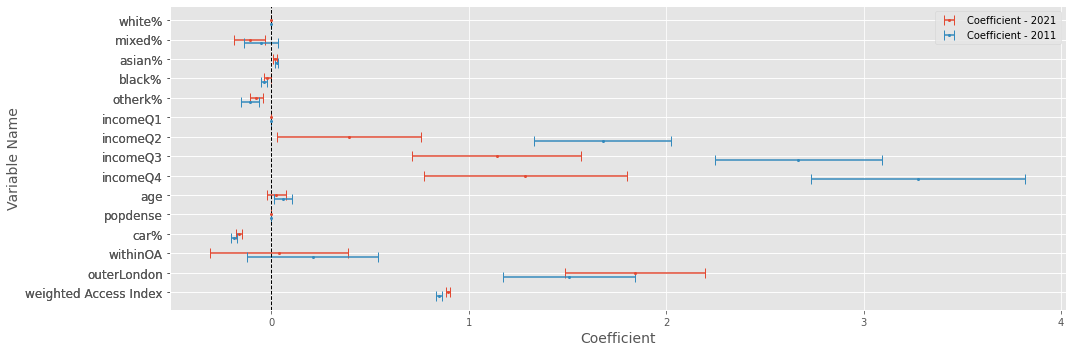

In [977]:
import matplotlib.pyplot as plt

# Your existing plotting code
fig, ax = plt.subplots(figsize=(15,5))

# Plot the data for year 2021
ax.errorbar(result_df[result_df['year'] == 2021]['coef'],
            result_df[result_df['year'] == 2021].index,
            xerr=result_df[result_df['year'] == 2021]['err'],
            fmt='o', markersize=2, capsize=5, label='Coefficient - 2021')

# Plot the data for year 2011 slightly above the 2021 line
ax.errorbar(result_df[result_df['year'] == 2011]['coef'],
            result_df[result_df['year'] == 2021].index + 0.2,  # Adjusted y-coordinate
            xerr=result_df[result_df['year'] == 2011]['err'],
            fmt='o', markersize=2, capsize=5, label='Coefficient - 2011')

ax.axvline(x=0, linestyle='--', color='black', linewidth=1)
ax.set_yticks(result_df.index)
ax.set_yticklabels(result_df['varname'], fontsize=12)
ax.set_xlabel('Coefficient', fontsize=14)
ax.set_ylabel('Variable Name', fontsize=14)
ax.legend()

# Reverse the y-axis to maintain the original order of variables
ax.invert_yaxis()

plt.tight_layout()
plt.show()


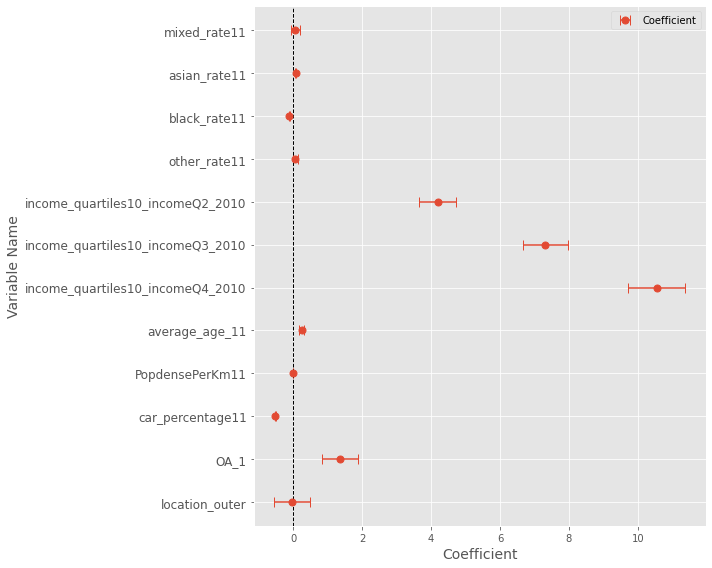

In [878]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.errorbar(coef_df['coef'], coef_df.index, xerr=coef_df['err'], fmt='o', markersize=7, capsize=5, label='Coefficient')

ax.axvline(x=0, linestyle='--', color='black', linewidth=1)
ax.set_yticks(coef_df.index)
ax.set_yticklabels(coef_df['varname'], fontsize=12)
ax.set_xlabel('Coefficient', fontsize=14)
ax.set_ylabel('Variable Name', fontsize=14)
ax.legend()

# Reverse the y-axis to maintain the original order of variables
ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [897]:
m11_vars = [
# 'geometry',
# 'total_access_index10', 
# 2011 data
# 'white_rate11',
    'mixed_rate11','asian_rate11', 'black_rate11', 'other_rate11', 
# 'income_quartiles10_incomeQ1_2010', 
    'income_quartiles10_incomeQ2_2010','income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010',
'average_age_11', 
'PopdensePerKm11',
'car_percentage11',

# 'lag_mixed_rate11', 'lag_asian_rate11', 'lag_black_rate11', 'lag_other_rate11',
#  'lag_income_quartiles10_incomeQ2_2010','lag_income_quartiles10_incomeQ3_2010', 'lag_income_quartiles10_incomeQ4_2010',

# 2021 data
 # 'total_access_index23', 
    # 'underground23', 'bus23', 'rail23', 'tram23',
# 'white_rate21', 
    # 'mixed_rate21', 'asian_rate21','black_rate21', 'other_rate21', 
# 'income_quartiles19_incomeQ1_2019', 
#     'income_quartiles19_incomeQ2_2019','income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019',
# 'average_age_21',
# 'PopdensePerKm21', 
# 'car_percentage21',

# 'lag_mixed_rate21', 'lag_asian_rate21', 'lag_black_rate21', 'lag_other_rate21', 'lag_incomeQ2_2019', 'lag_incomeQ3_2019','lag_incomeQ4_2019'

# change from 2011 to 2021
# 'AI_total_change', 
'OA_1',  
'location_outer', 
]
m11 = spreg.ML_Lag(data[['total_access_index10']].values, data[m11_vars].values, 
                  w=w,
                  name_y = 'total_access_index10', name_x = m11_vars)
print(m11.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :total_access_index10                Number of Observations:        4835
Mean dependent var  :     11.3852                Number of Variables   :          14
S.D. dependent var  :      9.8192                Degrees of Freedom    :        4821
Pseudo R-squared    :      0.8313
Spatial Pseudo R-squared:  0.5470
Sigma-square ML     :      16.423                Log likelihood        :  -13944.726
S.E of regression   :       4.053                Akaike info criterion :   27917.452
                                                 Schwarz criterion     :   28008.223

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------

In [896]:
m1_vars = [
# 'geometry',
# 'total_access_index10', 
# 2011 data
# 'white_rate11',
    # 'mixed_rate11','asian_rate11', 'black_rate11', 'other_rate11', 
# 'income_quartiles10_incomeQ1_2010', 
#     'income_quartiles10_incomeQ2_2010','income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010',
# 'average_age_11', 
# 'PopdensePerKm11',
# 'car_percentage11',

# 'lag_mixed_rate11', 'lag_asian_rate11', 'lag_black_rate11', 'lag_other_rate11',
#  'lag_income_quartiles10_incomeQ2_2010','lag_income_quartiles10_incomeQ3_2010', 'lag_income_quartiles10_incomeQ4_2010',

# 2021 data
 # 'total_access_index23', 
    # 'underground23', 'bus23', 'rail23', 'tram23',
# 'white_rate21', 
    'mixed_rate21', 'asian_rate21','black_rate21', 'other_rate21', 
# 'income_quartiles19_incomeQ1_2019', 
    'income_quartiles19_incomeQ2_2019','income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019',
'average_age_21',
'PopdensePerKm21', 
'car_percentage21',

# 'lag_mixed_rate21', 'lag_asian_rate21', 'lag_black_rate21', 'lag_other_rate21', 'lag_incomeQ2_2019', 'lag_incomeQ3_2019','lag_incomeQ4_2019'

# change from 2011 to 2021
# 'AI_total_change', 
'OA_1',  
'location_outer', 
]
m1 = spreg.ML_Lag(data[['total_access_index23']].values, data[m1_vars].values, 
                  w=w,
                  name_y = 'total_access_index23', name_x = m1_vars)
print(m1.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :total_access_index23                Number of Observations:        4835
Mean dependent var  :     13.2364                Number of Variables   :          14
S.D. dependent var  :     11.6486                Degrees of Freedom    :        4821
Pseudo R-squared    :      0.8722
Spatial Pseudo R-squared:  0.5087
Sigma-square ML     :      17.551                Log likelihood        :  -14166.582
S.E of regression   :       4.189                Akaike info criterion :   28361.163
                                                 Schwarz criterion     :   28451.934

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------

In [895]:
model = m1
print(spreg.diagnostics.log_likelihood(model))
print(spreg.diagnostics.r2(model))
print("%12.12f"%spreg.diagnostics.f_stat(model)[1])
from pysal.explore import esda
mi = esda.Moran(model.u, w)
print(mi.I)
print(mi.p_sim)

X = np.array(data[['mixed_rate11','asian_rate11', 'black_rate11', 'other_rate11', 
'income_quartiles10_incomeQ2_2010','income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010',
'average_age_11', 
'PopdensePerKm11',
'car_percentage11',
'OA_1',  
'location_outer']])
y = np.array(data['total_access_index23'])

# Fit the model
results = model.fit()

# Calculate Wald Test
wald_statistic = (results.betas / results.std_err) ** 2
wald_p_values = 1 - chi2.cdf(wald_statistic, df=results.df_model)

# Calculate Likelihood Ratio (LR) Test
null_model = pysal.model.spreg.OLS(y, X)
null_results = null_model.fit()
lr_statistic = 2 * (null_results.llf - results.llf)
lr_p_value = 1 - chi2.cdf(lr_statistic, df=results.df_model - null_results.df_model)

# Print the test statistic values and p-values
print("Wald Test Statistic:", wald_statistic)
print("Wald Test p-values:", wald_p_values)
print("Likelihood Ratio (LR) Test Statistic:", lr_statistic)
print("Likelihood Ratio (LR) Test p-value:", lr_p_value)

-13787.020829027077
0.8706232913350855
0.000000000000
0.1641671941458426
0.001


AttributeError: 'ML_Lag' object has no attribute 'fit'

In [577]:
m2_vars = [
# 'geometry',
# 'total_access_index10', 
# 2011 data
# 'white_rate11',
    # 'mixed_rate11','asian_rate11', 'black_rate11', 'other_rate11', 
# 'income_quartiles10_incomeQ1_2010', 
#     'income_quartiles10_incomeQ2_2010','income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010',
# 'average_age_11', 
# 'PopdensePerKm11',
# 'car_percentage11',

# 'lag_mixed_rate11', 'lag_asian_rate11', 'lag_black_rate11', 'lag_other_rate11',
#  'lag_income_quartiles10_incomeQ2_2010','lag_income_quartiles10_incomeQ3_2010', 'lag_income_quartiles10_incomeQ4_2010',

# 2021 data
 # 'total_access_index23', 
    # 'underground23', 'bus23', 'rail23', 'tram23',
# 'white_rate21', 
    'mixed_rate21', 'asian_rate21','black_rate21', 'other_rate21', 
# 'income_quartiles19_incomeQ1_2019', 
    'income_quartiles19_incomeQ2_2019','income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019',
'average_age_21',
'PopdensePerKm21', 
'car_percentage21',

# 'lag_mixed_rate21', 'lag_asian_rate21', 'lag_black_rate21', 'lag_other_rate21', 'lag_incomeQ2_2019', 'lag_incomeQ3_2019','lag_incomeQ4_2019'

# change from 2011 to 2021
# 'AI_total_change', 
'OA_1',  
'location_outer', 
]
m2 = spreg.ML_Error(data[['total_access_index23']].values, data[m2_vars].values, 
                  w=w,
                  name_y = 'total_access_index23', name_x = m2_vars)
print(m2.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :total_access_index23                Number of Observations:        4835
Mean dependent var  :     13.2364                Number of Variables   :          13
S.D. dependent var  :     11.6486                Degrees of Freedom    :        4822
Pseudo R-squared    :      0.5293
Sigma-square ML     :      16.401                Log likelihood        :  -14119.070
S.E of regression   :       4.050                Akaike info criterion :   28264.140
                                                 Schwarz criterion     :   28348.427

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------

___

                'AI_total_change','AI_bus_change','AI_rail_change','AI_underground_change'

In [579]:
m3_vars = [
# 'geometry',
# 'total_access_index10', 
# 2011 data
# 'white_rate11',
    # 'mixed_rate11','asian_rate11', 'black_rate11', 'other_rate11', 
# 'income_quartiles10_incomeQ1_2010', 
#     'income_quartiles10_incomeQ2_2010','income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010',
# 'average_age_11', 
# 'PopdensePerKm11',
# 'car_percentage11',

# 'lag_mixed_rate11', 'lag_asian_rate11', 'lag_black_rate11', 'lag_other_rate11',
#  'lag_income_quartiles10_incomeQ2_2010','lag_income_quartiles10_incomeQ3_2010', 'lag_income_quartiles10_incomeQ4_2010',

# 2021 data
 # 'total_access_index23', 
    # 'underground23', 'bus23', 'rail23', 'tram23',
# 'white_rate21', 
    'mixed_rate21', 'asian_rate21','black_rate21', 'other_rate21', 
# 'income_quartiles19_incomeQ1_2019', 
    'income_quartiles19_incomeQ2_2019','income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019',
'average_age_21',
'PopdensePerKm21', 
'car_percentage21',

'lag_mixed_rate21', 'lag_asian_rate21', 'lag_black_rate21', 'lag_other_rate21', 'lag_incomeQ2_2019', 'lag_incomeQ3_2019','lag_incomeQ4_2019',

# change from 2011 to 2021
# 'AI_total_change', 
'OA_1',  
'location_outer', 
]
m3 = spreg.ML_Lag(data[['total_access_index23']].values, data[m3_vars].values, 
                  w=w,
                  name_y = 'total_access_index23', name_x = m3_vars)
print(m3.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :total_access_index23                Number of Observations:        4835
Mean dependent var  :     13.2364                Number of Variables   :          21
S.D. dependent var  :     11.6486                Degrees of Freedom    :        4814
Pseudo R-squared    :      0.8751
Spatial Pseudo R-squared:  0.5230
Sigma-square ML     :      17.159                Log likelihood        :  -14113.831
S.E of regression   :       4.142                Akaike info criterion :   28269.663
                                                 Schwarz criterion     :   28405.819

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------

In [580]:
m4_vars = [
# 'geometry',
# 'total_access_index10', 
# 2011 data
# 'white_rate11',
    # 'mixed_rate11','asian_rate11', 'black_rate11', 'other_rate11', 
# 'income_quartiles10_incomeQ1_2010', 
#     'income_quartiles10_incomeQ2_2010','income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010',
# 'average_age_11', 
# 'PopdensePerKm11',
# 'car_percentage11',

# 'lag_mixed_rate11', 'lag_asian_rate11', 'lag_black_rate11', 'lag_other_rate11',
#  'lag_income_quartiles10_incomeQ2_2010','lag_income_quartiles10_incomeQ3_2010', 'lag_income_quartiles10_incomeQ4_2010',

# 2021 data
 # 'total_access_index23', 
    # 'underground23', 'bus23', 'rail23', 'tram23',
# 'white_rate21', 
    'mixed_rate21', 'asian_rate21','black_rate21', 'other_rate21', 
# 'income_quartiles19_incomeQ1_2019', 
    'income_quartiles19_incomeQ2_2019','income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019',
'average_age_21',
'PopdensePerKm21', 
'car_percentage21',

'lag_mixed_rate21', 'lag_asian_rate21', 'lag_black_rate21', 'lag_other_rate21', 'lag_incomeQ2_2019', 'lag_incomeQ3_2019','lag_incomeQ4_2019',

# change from 2011 to 2021
# 'AI_total_change', 
'OA_1',  
'location_outer', 
]
m4 = spreg.ML_Error(data[['total_access_index23']].values, data[m4_vars].values, 
                  w=w,
                  name_y = 'total_access_index23', name_x = m4_vars)
print(m4.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :total_access_index23                Number of Observations:        4835
Mean dependent var  :     13.2364                Number of Variables   :          20
S.D. dependent var  :     11.6486                Degrees of Freedom    :        4815
Pseudo R-squared    :      0.4825
Sigma-square ML     :      16.356                Log likelihood        :  -14110.882
S.E of regression   :       4.044                Akaike info criterion :   28261.764
                                                 Schwarz criterion     :   28391.437

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------

In [806]:
data.columns

Index(['LSOA11CD', 'geometry', 'total_access_index10', 'bus10', 'underground10', 'rail10', 'white_rate11', 'mixed_rate11', 'asian_rate11', 'black_rate11', 'other_rate11', 'income_quartiles10_incomeQ1_2010', 'income_quartiles10_incomeQ2_2010', 'income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010', 'average_age_11', 'PopdensePerKm11', 'car_percentage11', 'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23', 'white_rate21', 'mixed_rate21', 'asian_rate21', 'black_rate21', 'other_rate21', 'income_quartiles19_incomeQ1_2019', 'income_quartiles19_incomeQ2_2019', 'income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019', 'average_age_21', 'PopdensePerKm21', 'car_percentage21', 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change', 'OA_0', 'OA_1', 'location_inner', 'location_outer'], dtype='object')

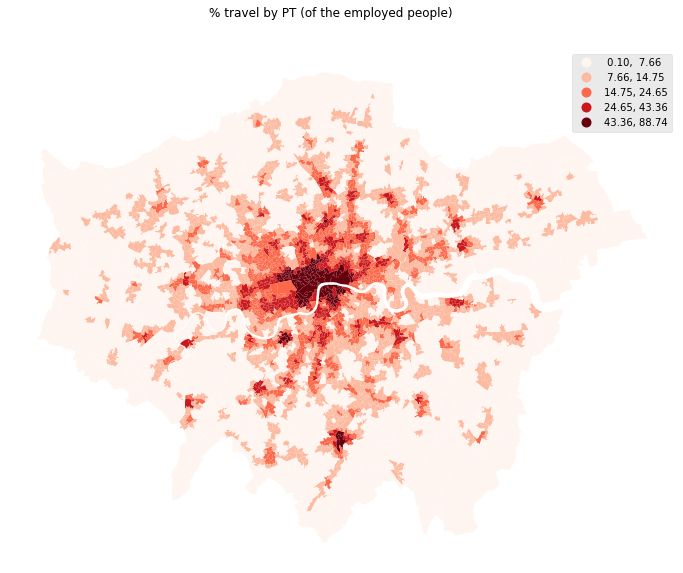

In [807]:
f = plt.figure(dpi = 72)
f.set_size_inches(12,10)

ax1 = f.add_subplot()
data.plot(column="total_access_index10", legend=True, ax = ax1,cmap="Reds", 
                        scheme="Natural_Breaks",
                        aspect=1)
ax1.set_axis_off()

f.subplots_adjust(top=1)
f.suptitle("% travel by PT (of the employed people)")

plt.axis('off')
plt.show()

## original ethnic data

In [106]:
ethnic_2011_raw = pd.read_excel("../data/census_2021_ethnic_groups/Ethnic group (1).xlsx",sheet_name = "2011")
ethnic_2021_raw = pd.read_excel("../data/census_2021_ethnic_groups/Ethnic group (1).xlsx",sheet_name = "2021")

In [107]:
sh = gpd.read_file("../data/QGIS_data/shapefile/lsoa_2011/LSOA_2011_London_gen_MHW.shp") 

In [108]:
sh.shape

(4835, 15)

In [109]:
cd11to22 = pd.read_csv("../data/QGIS_data/LSOA_(2011)_to_LSOA_(2021)_to_Local_Authority_District_(2022)_Lookup_for_England_and_Wales_(Version_2).csv")

In [110]:
cd11to22.shape

(34753, 8)

In [111]:
cd11to22.columns

Index(['ObjectId', 'LSOA11CD', 'LSOA11NM', 'LSOA21CD', 'LSOA21NM', 'LAD22CD', 'LAD22NM', 'LAD22NMW'], dtype='object')

In [112]:
cd11to22.head()
cd11to22 = cd11to22[['LSOA11CD',  'LSOA21CD']]

In [113]:
sh.columns

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM', 'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ', 'geometry'], dtype='object')

In [114]:
ethnic_2011_raw.columns

Index(['LSOA code', 'local authority name', 'local authority code', 'All usual residents', 'White British', 'White Irish', 'White Gypsy/Irish Traveller', 'Unnamed: 7', 'White Other', 'Mixed White and Asian', 'Mixed White and Black African', 'Mixed White and Black Caribbean', 'Mixed Other', 'Asian Bangladeshi', 'Asian Chinese', 'Asian Indian', 'Asian Pakistani', 'Asian Other', 'Black African', 'Black Caribbean', 'Black Other', 'Other Arab', 'Other Any other'], dtype='object')

In [115]:
ethnic_2011_raw.shape

(4994, 23)

In [116]:
ethnic_2011 = ethnic_2011_raw.rename(columns={'LSOA code': 'LSOA21CD'})
ethnic_2021 = ethnic_2021_raw.rename(columns={'LSOA code': 'LSOA21CD'})

In [117]:
ethnic_2011.columns

Index(['LSOA21CD', 'local authority name', 'local authority code', 'All usual residents', 'White British', 'White Irish', 'White Gypsy/Irish Traveller', 'Unnamed: 7', 'White Other', 'Mixed White and Asian', 'Mixed White and Black African', 'Mixed White and Black Caribbean', 'Mixed Other', 'Asian Bangladeshi', 'Asian Chinese', 'Asian Indian', 'Asian Pakistani', 'Asian Other', 'Black African', 'Black Caribbean', 'Black Other', 'Other Arab', 'Other Any other'], dtype='object')

In [118]:
ethnic_2011  = ethnic_2011.merge(cd11to22, left_on='LSOA21CD', right_on = "LSOA21CD" ,how='left')
ethnic_2011.columns

Index(['LSOA21CD', 'local authority name', 'local authority code', 'All usual residents', 'White British', 'White Irish', 'White Gypsy/Irish Traveller', 'Unnamed: 7', 'White Other', 'Mixed White and Asian', 'Mixed White and Black African', 'Mixed White and Black Caribbean', 'Mixed Other', 'Asian Bangladeshi', 'Asian Chinese', 'Asian Indian', 'Asian Pakistani', 'Asian Other', 'Black African', 'Black Caribbean', 'Black Other', 'Other Arab', 'Other Any other', 'LSOA11CD'], dtype='object')

In [119]:
ethnic_2011

LSOA21CD local authority name local authority code  All usual residents  White British  White Irish  White Gypsy/Irish Traveller  Unnamed: 7  White Other  Mixed White and Asian  Mixed White and Black African  Mixed White and Black Caribbean  Mixed Other  Asian Bangladeshi  Asian Chinese  Asian Indian  Asian Pakistani  Asian Other  Black African  Black Caribbean  Black Other  Other Arab  Other Any other   LSOA11CD
0     E01000001       City of London            E09000001                 1465            968           32                            1         NaN          237                     26                              3                                6           19                  3             44            49                3           29              6                1            4           6               28  E01000001
1     E01000002       City of London            E09000001                 1436           1024           28                            0         NaN          222                     22                              9                                2           21                  0             37            30                0           28              0                3            1           3                6  E01000002
2     E01000003       City of London            E09000001                 1346            813           37                            0         NaN          205                     18                              4                                7           26                  9             44            48                6           61             23               13            9          13               10  E01000003
3     E01000005       City of London            E09000001                  985            358           16                            1         NaN          131                     14                             14                               16           15                216             19            16                0           23             52               23           25          25               21  E01000005
4     E01032739       City of London            E09000001                 1044            485           34                            1         NaN          293                     17                              4                                3           13                  3             51            54                6           48              3                2            4          11               12  E01032739
...         ...                  ...                  ...                  ...            ...          ...                          ...         ...          ...                    ...                            ...                              ...          ...                ...            ...           ...              ...          ...            ...              ...          ...         ...              ...        ...
5013  E01035720          Westminster            E09000033                 1115            571           28                            1         NaN          219                     12                             16                               12           10                  1             13            21               11           85             38               15           14          25               23        NaN
5014  E01035721          Westminster            E09000033                 2716           1235           75                            0         NaN          527                     27                             37                               24           50                124             32            47               34          133            130               41           31         104               65  E01004666
5015  E01035721          Westminster            E09000033                 2716           1235           75                            0         NaN          527                     27        

In [120]:
ethnic_2021  = ethnic_2021.merge(cd11to22, left_on='LSOA21CD', right_on = "LSOA21CD" ,how='left')
ethnic_2021.columns

Index(['LSOA21CD', 'local authority name', 'local authority code', 'All usual residents', 'White British', 'White Irish', 'White Gypsy/Irish Traveller', 'White Roma', 'White Other', 'Mixed White and Asian', 'Mixed White and Black African', 'Mixed White and Black Caribbean', 'Mixed Other', 'Asian Bangladeshi', 'Asian Chinese', 'Asian Indian', 'Asian Pakistani', 'Asian Other', 'Black African', 'Black Caribbean', 'Black Other', 'Other Arab', 'Other Any other', 'LSOA11CD'], dtype='object')

In [121]:
sh.columns

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM', 'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ', 'geometry'], dtype='object')

In [122]:
sh = sh[['LSOA11CD', 'geometry']]

In [123]:
ethnic_2011  = sh.merge(ethnic_2011, left_on='LSOA11CD', right_on = "LSOA11CD" ,how='left')

In [124]:
ethnic_2011.isna().sum()

LSOA11CD                              0
geometry                              0
LSOA21CD                              0
local authority name                  0
local authority code                  0
All usual residents                   0
White British                         0
White Irish                           0
White Gypsy/Irish Traveller           0
Unnamed: 7                         4835
White Other                           0
Mixed White and Asian                 0
Mixed White and Black African         0
Mixed White and Black Caribbean       0
Mixed Other                           0
Asian Bangladeshi                     0
Asian Chinese                         0
Asian Indian                          0
Asian Pakistani                       0
Asian Other                           0
Black African                         0
Black Caribbean                       0
Black Other                           0
Other Arab                            0
Other Any other                       0


In [125]:
ethnic_2021  = sh.merge(ethnic_2021, left_on='LSOA11CD', right_on = "LSOA11CD" ,how='left')

In [126]:
ethnic_2011.columns

Index(['LSOA11CD', 'geometry', 'LSOA21CD', 'local authority name', 'local authority code', 'All usual residents', 'White British', 'White Irish', 'White Gypsy/Irish Traveller', 'Unnamed: 7', 'White Other', 'Mixed White and Asian', 'Mixed White and Black African', 'Mixed White and Black Caribbean', 'Mixed Other', 'Asian Bangladeshi', 'Asian Chinese', 'Asian Indian', 'Asian Pakistani', 'Asian Other', 'Black African', 'Black Caribbean', 'Black Other', 'Other Arab', 'Other Any other'], dtype='object')

In [127]:
ethnic_2021.columns

Index(['LSOA11CD', 'geometry', 'LSOA21CD', 'local authority name', 'local authority code', 'All usual residents', 'White British', 'White Irish', 'White Gypsy/Irish Traveller', 'White Roma', 'White Other', 'Mixed White and Asian', 'Mixed White and Black African', 'Mixed White and Black Caribbean', 'Mixed Other', 'Asian Bangladeshi', 'Asian Chinese', 'Asian Indian', 'Asian Pakistani', 'Asian Other', 'Black African', 'Black Caribbean', 'Black Other', 'Other Arab', 'Other Any other'], dtype='object')

- A White: English/Welsh/Scottish/Northern Irish/British; Irish; Gypsy or Irish Traveller; Any other White;

- B Mixed/multiple ethnic groups: White and Black Caribbean; White and Black African; White and Asian; Any other Mixed/multiple ethnic background;

- C Asian/Asian British: Indian; Pakistani; Bangladeshi; Chinese; Any other Asian background;
- D Black/African/Caribbean/Black British: African; Caribbean; Any other Black/African/Caribbean background;
- E Other ethnic group: Arab; Any other ethnic group

In [128]:
ethnic_2011.iloc[:,20]

0         6
1         0
2        23
3        52
4       106
       ... 
4830    348
4831    986
4832    462
4833    734
4834     41
Name: Black African, Length: 4835, dtype: int64

In [129]:
ethnic_2011 = ethnic_2011[['LSOA11CD', #0
                           'All usual residents', #1
'White British','White Irish', 'White Gypsy/Irish Traveller', 'White Other', #2-5

'Mixed White and Asian', 'Mixed White and Black African','Mixed White and Black Caribbean', 'Mixed Other', #6-9
                           
'Asian Bangladeshi','Asian Chinese', 'Asian Indian', 'Asian Pakistani', 'Asian Other',#10-14
                           
 'Black African', 'Black Caribbean', 'Black Other', #15-17
                           
'Other Arab','Other Any other',#18-19
                           'geometry']]

In [130]:
ethnic_2021 = ethnic_2021[['LSOA11CD', #0
                           'All usual residents', #1
'White British', 'White Irish', 'White Gypsy/Irish Traveller', 'White Roma', 'White Other', #2-6!!!!!
'Mixed White and Asian', 'Mixed White and Black African', 'Mixed White and Black Caribbean', 'Mixed Other', #7-10!!!
'Asian Bangladeshi',  'Asian Chinese', 'Asian Indian', 'Asian Pakistani', 'Asian Other',#11-15!!!
       'Black African', 'Black Caribbean', 'Black Other',#16-18!!!
                           'Other Arab',  'Other Any other',#19-20!!!
                           'geometry']]

### breakdown of Black and Asian groups.

In [131]:
bl_2011 = ethnic_2011[['LSOA11CD', #0
                           'All usual residents', #1
'Asian Bangladeshi','Asian Chinese', 'Asian Indian', 'Asian Pakistani', 'Asian Other',#10-14
 'Black African', 'Black Caribbean', 'Black Other', #15-17

                           'geometry']]

# clean names of the columns
bl_2011 = bl_2011.rename(columns={'All usual residents': 'res11', 
                                    'Asian Bangladeshi': 'AsianBangladeshi11',
                                    'Asian Chinese': 'AsianChinese11', 
                                    'Asian Indian': 'AsianIndian11',
                                    'Asian Pakistani': 'AsianPakistani11', 
                                    'Asian Other': 'AsianOther11',                           
                                                                    
                              'Black African': 'BlackAfrican11',
                                 'Black Caribbean': 'BlackCaribbean11', 
                              'Black Other': 'Blackother11',})

In [132]:
bl_2021 = ethnic_2021[['LSOA11CD', #0
                           'All usual residents', #1
                       'Asian Bangladeshi',  'Asian Chinese', 'Asian Indian', 'Asian Pakistani', 'Asian Other',#11-15!!!
       'Black African', 'Black Caribbean', 'Black Other',#16-18!!!
                           'geometry']]
bl_2021 = bl_2021.rename(columns={'All usual residents': 'res21', 
                                  'Asian Bangladeshi': 'AsianBangladeshi21',
                                    'Asian Chinese': 'AsianChinese21', 
                                    'Asian Indian': 'AsianIndian21',
                                    'Asian Pakistani': 'AsianPakistani21', 
                                    'Asian Other': 'AsianOther21',                           
                                                                    
                                  
                              'Black African': 'BlackAfrican21',
                                 'Black Caribbean': 'BlackCaribbean21', 
                              'Black Other': 'Blackother21',})

In [133]:
blchange = pd.merge(bl_2011, bl_2021.drop('geometry',axis = 1), left_on='LSOA11CD', right_on='LSOA11CD', how='left')

In [134]:
blchange.columns

Index(['LSOA11CD', 'res11', 'AsianBangladeshi11', 'AsianChinese11', 'AsianIndian11', 'AsianPakistani11', 'AsianOther11', 'BlackAfrican11', 'BlackCaribbean11', 'Blackother11', 'geometry', 'res21', 'AsianBangladeshi21', 'AsianChinese21', 'AsianIndian21', 'AsianPakistani21', 'AsianOther21', 'BlackAfrican21', 'BlackCaribbean21', 'Blackother21'], dtype='object')

In [135]:
blchange["BlackAfrican11rate"] = blchange["BlackAfrican11"]/blchange["res11"]
blchange["BlackCaribbean11rate"] = blchange["BlackCaribbean11"]/blchange["res11"]
blchange["Blackother11rate"] = blchange["Blackother11"]/blchange["res11"]

blchange["AsianBangladeshi11rate"] = blchange["AsianBangladeshi11"]/blchange["res11"]
blchange["AsianChinese11rate"] = blchange["AsianChinese11"]/blchange["res11"]
blchange["AsianIndian11rate"] = blchange["AsianIndian11"]/blchange["res11"]
blchange["AsianPakistani11rate"] = blchange["AsianPakistani11"]/blchange["res11"]
blchange["AsianOther11rate"] = blchange["AsianOther11"]/blchange["res11"]

blchange["BlackAfrican21rate"] = blchange["BlackAfrican21"]/blchange["res21"]
blchange["BlackCaribbean21rate"] = blchange["BlackCaribbean21"]/blchange["res21"]
blchange["Blackother21rate"] = blchange["Blackother21"]/blchange["res21"]

blchange["AsianBangladeshi21rate"] = blchange["AsianBangladeshi21"]/blchange["res11"]
blchange["AsianChinese21rate"] = blchange["AsianChinese21"]/blchange["res11"]
blchange["AsianIndian21rate"] = blchange["AsianIndian21"]/blchange["res11"]
blchange["AsianPakistani21rate"] = blchange["AsianPakistani21"]/blchange["res11"]
blchange["AsianOther21rate"] = blchange["AsianOther21"]/blchange["res11"]

blchange.describe()

res11                       AsianBangladeshi11                           AsianChinese11                            AsianIndian11                         AsianPakistani11                             AsianOther11                           BlackAfrican11                         BlackCaribbean11                             Blackother11                                    res21                       AsianBangladeshi21                           AsianChinese21                            AsianIndian21                         AsianPakistani21                             AsianOther21                           BlackAfrican21                         BlackCaribbean21                             Blackother21                       BlackAfrican11rate                     BlackCaribbean11rate                         Blackother11rate                   AsianBangladeshi11rate                       AsianChinese11rate                        AsianIndian11rate  \
count                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000                               4,835.0000   
mean                                1,680.5715                                  45.3781                                  25.5942                                 110.6492                                  45.7226                                  81.6786                                 118.0662                                  70.7820                                  34.9392                               1,773.7882                                  63.8904                                  28.3384                                 130.8581                                  58.6505                                  80.3533                                 139.9272                                  69.8976                                  29.4583                                   0.0688                                   0.0416                                   0.0203                                   0.0260                                   0.0151                                   0.0644   
std                                   288.9679                                 119.2936                                  27.8534                                 162.3501                                  74.8944                                  71.5322                                 121.3380                                  70.8582                                  34.2710                                 320.7595                                 151.0575                                  29.1739                                 186.1500                                  88.5945                                  68.4470                                 132.6401                                  68.0016                                  28.2341                                   0.0658                                   0.0408                                   0.0192                                   0.0660                                   0.0153                                   0.0904   
min                                   276.0000                       

In [136]:
blchange.columns

Index(['LSOA11CD', 'res11', 'AsianBangladeshi11', 'AsianChinese11', 'AsianIndian11', 'AsianPakistani11', 'AsianOther11', 'BlackAfrican11', 'BlackCaribbean11', 'Blackother11', 'geometry', 'res21', 'AsianBangladeshi21', 'AsianChinese21', 'AsianIndian21', 'AsianPakistani21', 'AsianOther21', 'BlackAfrican21', 'BlackCaribbean21', 'Blackother21', 'BlackAfrican11rate', 'BlackCaribbean11rate', 'Blackother11rate', 'AsianBangladeshi11rate', 'AsianChinese11rate', 'AsianIndian11rate', 'AsianPakistani11rate', 'AsianOther11rate', 'BlackAfrican21rate', 'BlackCaribbean21rate', 'Blackother21rate', 'AsianBangladeshi21rate', 'AsianChinese21rate', 'AsianIndian21rate', 'AsianPakistani21rate', 'AsianOther21rate'], dtype='object')

In [137]:
blchange["BlackAfrican_change_rate"] = blchange["BlackAfrican21rate"] - blchange["BlackAfrican11rate"]
blchange["BlackCaribbean_change_rate"] = blchange["BlackCaribbean21rate"] - blchange["BlackCaribbean11rate"]
blchange["Blackother_change_rate"] = blchange["Blackother21rate"] - blchange["Blackother11rate"]

blchange["AsianBangladeshi_change_rate"] = blchange["AsianBangladeshi21rate"] - blchange["AsianBangladeshi11rate"]
blchange["AsianChinese_change_rate"] = blchange["AsianChinese21rate"] - blchange["AsianChinese11rate"]
blchange["AsianIndian_change_rate"] = blchange["AsianIndian21rate"] - blchange["AsianIndian11rate"]
blchange["AsianPakistani_change_rate"] = blchange["AsianPakistani21rate"] - blchange["AsianPakistani11rate"]
blchange["AsianOther_change_rate"] = blchange["AsianOther21rate"] - blchange["AsianOther11rate"]


In [138]:
blchange.columns

Index(['LSOA11CD', 'res11', 'AsianBangladeshi11', 'AsianChinese11', 'AsianIndian11', 'AsianPakistani11', 'AsianOther11', 'BlackAfrican11', 'BlackCaribbean11', 'Blackother11', 'geometry', 'res21', 'AsianBangladeshi21', 'AsianChinese21', 'AsianIndian21', 'AsianPakistani21', 'AsianOther21', 'BlackAfrican21', 'BlackCaribbean21', 'Blackother21', 'BlackAfrican11rate', 'BlackCaribbean11rate', 'Blackother11rate', 'AsianBangladeshi11rate', 'AsianChinese11rate', 'AsianIndian11rate', 'AsianPakistani11rate', 'AsianOther11rate', 'BlackAfrican21rate', 'BlackCaribbean21rate', 'Blackother21rate', 'AsianBangladeshi21rate', 'AsianChinese21rate', 'AsianIndian21rate', 'AsianPakistani21rate', 'AsianOther21rate', 'BlackAfrican_change_rate', 'BlackCaribbean_change_rate', 'Blackother_change_rate', 'AsianBangladeshi_change_rate', 'AsianChinese_change_rate', 'AsianIndian_change_rate', 'AsianPakistani_change_rate', 'AsianOther_change_rate'], dtype='object')

In [139]:
select = blchange[[
    'BlackAfrican_change_rate',
       'BlackCaribbean_change_rate', 'Blackother_change_rate',
    
'AsianBangladeshi_change_rate', 'AsianChinese_change_rate', 'AsianIndian_change_rate', 'AsianPakistani_change_rate', 'AsianOther_change_rate']]

<AxesSubplot:>

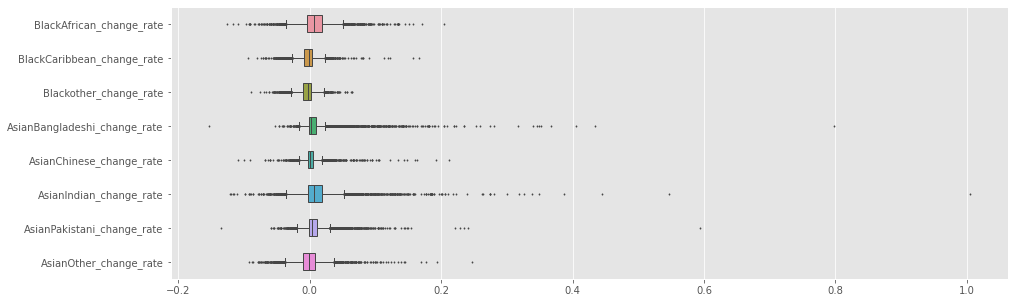

In [140]:
plt.figure(figsize=(15,5))
sns.boxplot(data=select,width=0.5,orient = 'h',linewidth=1,fliersize = 1)

In [141]:
select.loc[select['AsianBangladeshi_change_rate'] > 0.3, 'AsianBangladeshi_change_rate'] = 0
select.loc[select['AsianIndian_change_rate'] > 0.3, 'AsianIndian_change_rate'] = 0
select.loc[select['AsianPakistani_change_rate'] > 0.3, 'AsianPakistani_change_rate'] = 0

/tmp/ipykernel_85/440174990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select.loc[select['AsianBangladeshi_change_rate'] > 0.3, 'AsianBangladeshi_change_rate'] = 0
/tmp/ipykernel_85/440174990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select.loc[select['AsianIndian_change_rate'] > 0.3, 'AsianIndian_change_rate'] = 0
/tmp/ipykernel_85/440174990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select.loc[select['Asia

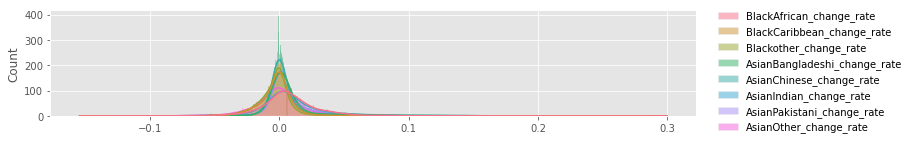

In [142]:
sns.displot(data=select,  kde=True,height=2,aspect=5)

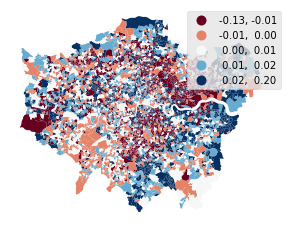

In [143]:
f = plt.figure(dpi = 72)
f.set_size_inches(5,4)

ax1 = f.add_subplot()
blchange.plot(column='BlackAfrican_change_rate', legend=True, cmap='RdBu',  ax=ax1,scheme="quantiles")
ax1.set_axis_off()

f.subplots_adjust(top=1)
# f.suptitle("Average crime rate () in London LSOAs (2010 ~ 2021)")

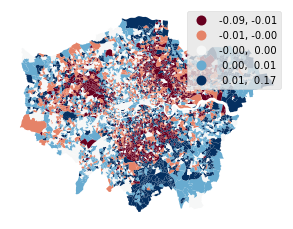

In [144]:
f = plt.figure(dpi = 72)
f.set_size_inches(5,4)

ax1 = f.add_subplot()
blchange.plot(column='BlackCaribbean_change_rate', legend=True, cmap='RdBu',  ax=ax1,scheme="quantiles")
ax1.set_axis_off()

f.subplots_adjust(top=1)
# f.suptitle("Average crime rate () in London LSOAs (2010 ~ 2021)")

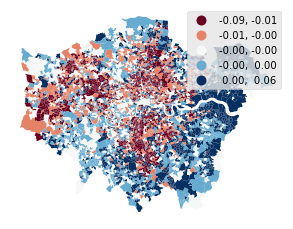

In [145]:
f = plt.figure(dpi = 72)
f.set_size_inches(5,4)

ax1 = f.add_subplot()
blchange.plot(column='Blackother_change_rate', legend=True, cmap='RdBu',  ax=ax1,scheme="quantiles")
ax1.set_axis_off()

f.subplots_adjust(top=1)
# f.suptitle("Average crime rate () in London LSOAs (2010 ~ 2021)")

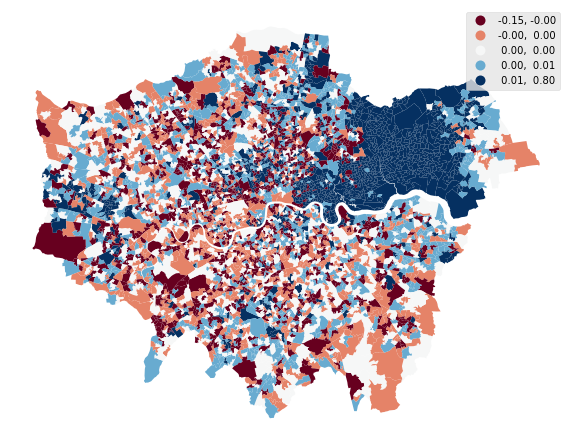

In [146]:
f = plt.figure(dpi = 72)
f.set_size_inches(10,8)

ax1 = f.add_subplot()
blchange.plot(column='AsianBangladeshi_change_rate', legend=True, cmap='RdBu',  ax=ax1,scheme="quantiles")
ax1.set_axis_off()

f.subplots_adjust(top=1)
# f.suptitle("Average crime rate () in London LSOAs (2010 ~ 2021)")

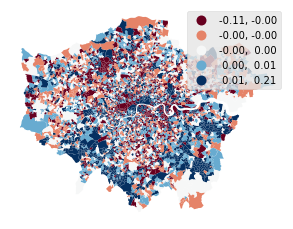

In [147]:
f = plt.figure(dpi = 72)
f.set_size_inches(5,4)

ax1 = f.add_subplot()
blchange.plot(column='AsianChinese_change_rate', legend=True, cmap='RdBu',  ax=ax1,scheme="quantiles")
ax1.set_axis_off()

f.subplots_adjust(top=1)
# f.suptitle("Average crime rate () in London LSOAs (2010 ~ 2021)")

In [148]:
blchange.columns

Index(['LSOA11CD', 'res11', 'AsianBangladeshi11', 'AsianChinese11', 'AsianIndian11', 'AsianPakistani11', 'AsianOther11', 'BlackAfrican11', 'BlackCaribbean11', 'Blackother11', 'geometry', 'res21', 'AsianBangladeshi21', 'AsianChinese21', 'AsianIndian21', 'AsianPakistani21', 'AsianOther21', 'BlackAfrican21', 'BlackCaribbean21', 'Blackother21', 'BlackAfrican11rate', 'BlackCaribbean11rate', 'Blackother11rate', 'AsianBangladeshi11rate', 'AsianChinese11rate', 'AsianIndian11rate', 'AsianPakistani11rate', 'AsianOther11rate', 'BlackAfrican21rate', 'BlackCaribbean21rate', 'Blackother21rate', 'AsianBangladeshi21rate', 'AsianChinese21rate', 'AsianIndian21rate', 'AsianPakistani21rate', 'AsianOther21rate', 'BlackAfrican_change_rate', 'BlackCaribbean_change_rate', 'Blackother_change_rate', 'AsianBangladeshi_change_rate', 'AsianChinese_change_rate', 'AsianIndian_change_rate', 'AsianPakistani_change_rate', 'AsianOther_change_rate'], dtype='object')

In [149]:
blchange = blchange[
['LSOA11CD',
   'BlackAfrican_change_rate', 'BlackCaribbean_change_rate', 'Blackother_change_rate',
'AsianBangladeshi_change_rate', 'AsianChinese_change_rate', 'AsianIndian_change_rate', 'AsianPakistani_change_rate', 'AsianOther_change_rate'
]
]

In [150]:

blchange = pd.merge(blchange, ptalLSOA_change, left_on='LSOA11CD', right_on='LSOA11CD', how='left')

In [151]:
blchange.columns

Index(['LSOA11CD', 'BlackAfrican_change_rate', 'BlackCaribbean_change_rate', 'Blackother_change_rate', 'AsianBangladeshi_change_rate', 'AsianChinese_change_rate', 'AsianIndian_change_rate', 'AsianPakistani_change_rate', 'AsianOther_change_rate', 'total_access_index10', 'bus10', 'underground10', 'rail10', 'geometry', 'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23', 'OA', 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change'], dtype='object')

In [152]:
blchangenew = blchange[
[
    # 'LSOA11CD',
   'BlackAfrican_change_rate', 'BlackCaribbean_change_rate', 'Blackother_change_rate',
'AsianBangladeshi_change_rate', 'AsianChinese_change_rate', 'AsianIndian_change_rate', 'AsianPakistani_change_rate', 'AsianOther_change_rate',
'geometry', 
 'AI_total_change',
    # 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change'
]
]

<Figure size 40x40 with 0 Axes>

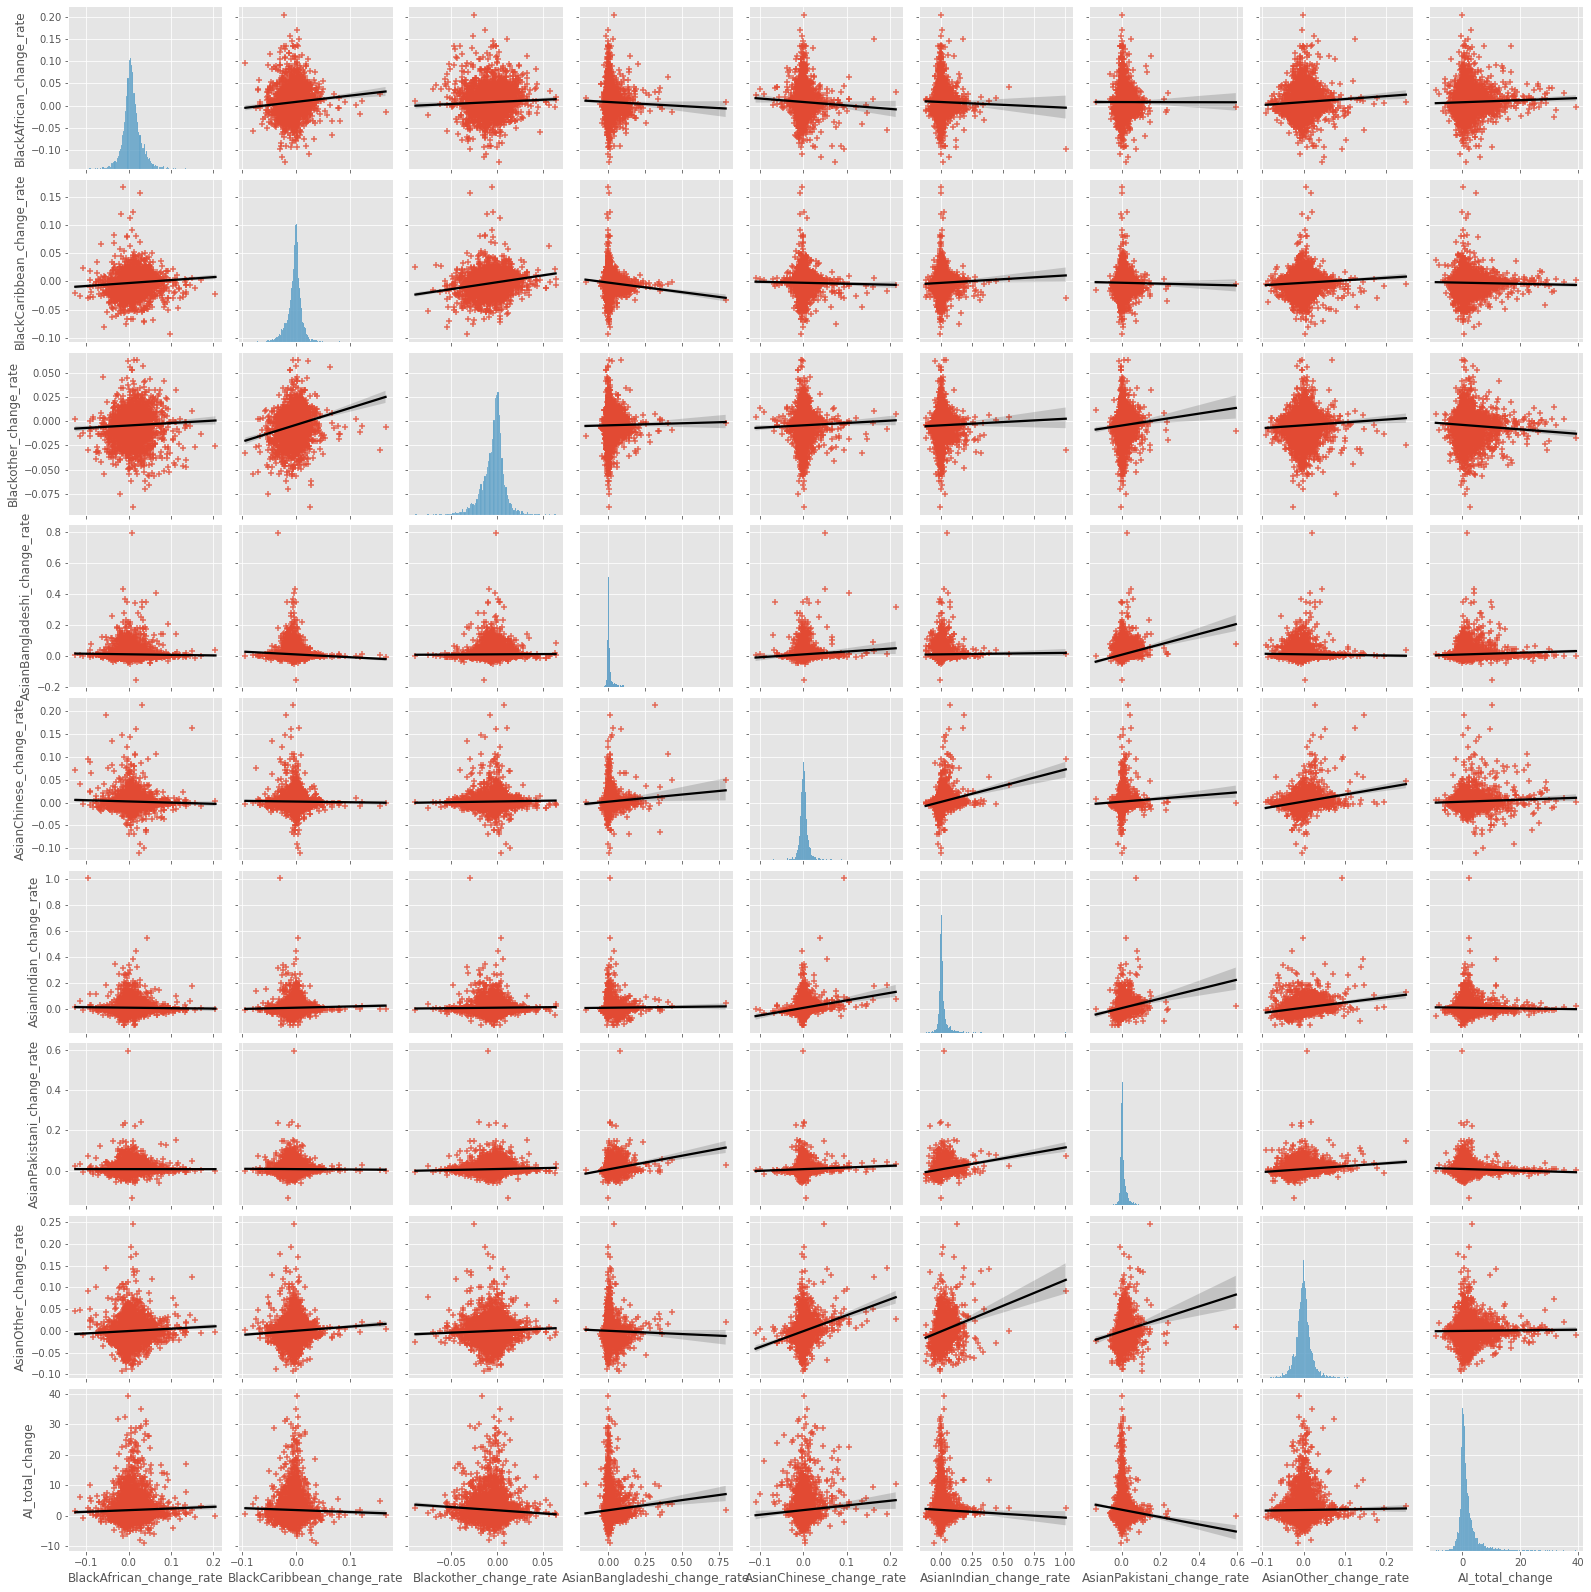

In [153]:
plt.figure(figsize=(5,5),dpi = 8)
sns.pairplot(blchangenew,markers="+",corner=False,kind="reg", plot_kws={'line_kws':{'color':'black'}})

Text(0.5, 1.0, 'Correlation Matrix')

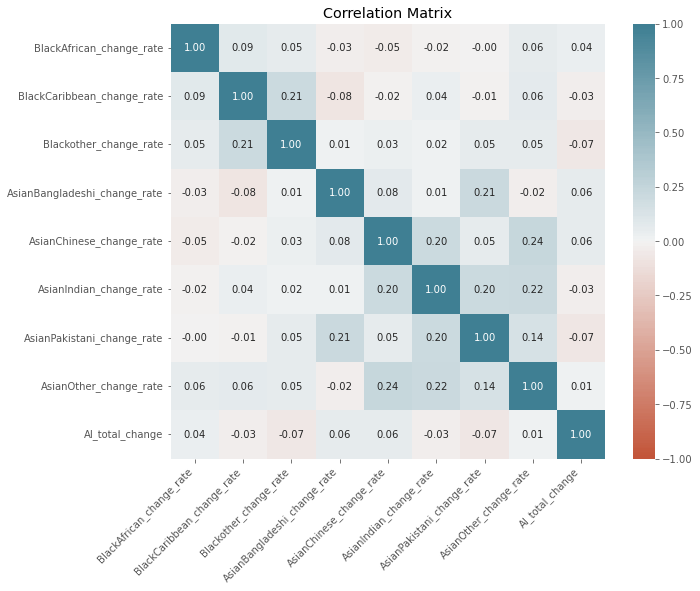

In [154]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(blchangenew.corr(), # plot a correlation matrix 
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True) # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Matrix') # add a title


In [980]:
w = weights.KNN.from_dataframe(blchangenew, k=8)
w.transform = 'R'

mtest_vars = [
    'BlackAfrican_change_rate', 'BlackCaribbean_change_rate', 'Blackother_change_rate',
    'AsianBangladeshi_change_rate', 'AsianChinese_change_rate', 'AsianIndian_change_rate', 'AsianPakistani_change_rate', 'AsianOther_change_rate',
# 'geometry', 
 # 'AI_total_change',
]
mtest = spreg.OLS(blchangenew[['AI_total_change']].values, blchangenew[mtest_vars].values, 
                  w=w,spat_diag=True,
                  name_y = 'AI_total_change', name_x = mtest_vars)
print(mtest.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :AI_total_change                Number of Observations:        4835
Mean dependent var  :      1.8511                Number of Variables   :           9
S.D. dependent var  :      3.6507                Degrees of Freedom    :        4826
R-squared           :      0.0215
Adjusted R-squared  :      0.0199
Sum squared residual:   63039.985                F-statistic           :     13.2708
Sigma-square        :      13.063                Prob(F-statistic)     :   3.893e-19
S.E. of regression  :       3.614                Log likelihood        :  -13068.437
Sigma-square ML     :      13.038                Akaike info criterion :   26154.874
S.E of regression ML:      3.6109                Schwarz criterion     :   26213.227

--------------------------------------------------------------------------

In [981]:
model = mtest
print(spreg.diagnostics.log_likelihood(model))
print(spreg.diagnostics.r2(model))
print("%12.12f"%spreg.diagnostics.f_stat(model)[1])

-13068.437221743032
0.021525356617593694
0.000000000000


In [863]:
model = mtest
print(spreg.diagnostics.log_likelihood(model))
print(spreg.diagnostics.r2(model))
print("%12.12f"%spreg.diagnostics.f_stat(model)[1])

15317.647157416985
0.310072300638669
0.000000000000


In [983]:
# Create lagged variables
blchangenew['lag_BlackAfrican_change'] = weights.lag_spatial(w, blchangenew['BlackAfrican_change_rate'])
blchangenew['lag_BlackCaribbean_change'] = weights.lag_spatial(w, blchangenew['BlackCaribbean_change_rate'])
blchangenew['lag_Blackother_change'] = weights.lag_spatial(w, blchangenew['Blackother_change_rate'])

blchangenew['lag_AsianBangladeshi_change'] = weights.lag_spatial(w, blchangenew['AsianBangladeshi_change_rate'])
blchangenew['lag_AsianChinese_change'] = weights.lag_spatial(w, blchangenew['AsianChinese_change_rate'])
blchangenew['lag_AsianIndian_change'] = weights.lag_spatial(w, blchangenew['AsianIndian_change_rate'])
blchangenew['lag_AsianPakistani_change'] = weights.lag_spatial(w, blchangenew['AsianPakistani_change_rate'])
blchangenew['lag_AsianOther_change'] = weights.lag_spatial(w, blchangenew['AsianOther_change_rate'])

/tmp/ipykernel_19085/3510135264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blchangenew['lag_BlackAfrican_change'] = weights.lag_spatial(w, blchangenew['BlackAfrican_change_rate'])
/tmp/ipykernel_19085/3510135264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blchangenew['lag_BlackCaribbean_change'] = weights.lag_spatial(w, blchangenew['BlackCaribbean_change_rate'])
/tmp/ipykernel_19085/3510135264.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [984]:
blchangenew.columns

Index(['BlackAfrican_change_rate', 'BlackCaribbean_change_rate', 'Blackother_change_rate', 'AsianBangladeshi_change_rate', 'AsianChinese_change_rate', 'AsianIndian_change_rate', 'AsianPakistani_change_rate', 'AsianOther_change_rate', 'geometry', 'AI_total_change', 'lag_BlackAfrican_change', 'lag_BlackCaribbean_change', 'lag_Blackother_change', 'lag_AsianBangladeshi_change', 'lag_AsianChinese_change', 'lag_AsianIndian_change', 'lag_AsianPakistani_change', 'lag_AsianOther_change'], dtype='object')

In [988]:
mtestDW_vars = [
'BlackAfrican_change_rate', 'BlackCaribbean_change_rate', 'Blackother_change_rate', 
    'AsianBangladeshi_change_rate', 'AsianChinese_change_rate', 'AsianIndian_change_rate', 
    'AsianPakistani_change_rate', 'AsianOther_change_rate',
    # 'geometry',
    # 'AI_total_change',
    # 'lag_BlackAfrican_change', 'lag_BlackCaribbean_change', 'lag_Blackother_change', 
    # 'lag_AsianBangladeshi_change', 'lag_AsianChinese_change', 'lag_AsianIndian_change', 
    # 'lag_AsianPakistani_change', 'lag_AsianOther_change'
]
mtestDW = spreg.ML_Lag(blchangenew[['AI_total_change']].values, blchangenew[mtestDW_vars].values, 
                  w=w,
                  name_y = 'AI_total_change', name_x = mtestDW_vars)
print(mtestDW.summary)

/opt/conda/lib/python3.10/site-packages/scipy/optimize/_minimize.py:870: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :AI_total_change                Number of Observations:        4835
Mean dependent var  :      1.8511                Number of Variables   :          10
S.D. dependent var  :      3.6507                Degrees of Freedom    :        4825
Pseudo R-squared    :      0.6412
Spatial Pseudo R-squared:  0.0396
Sigma-square ML     :       5.031                Log likelihood        :  -11113.905
S.E of regression   :       2.243                Akaike info criterion :   22247.810
                                                 Schwarz criterion     :   22312.646

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
--------------------------

# Check autocorrelation


### check the auto correlation by Moran's I.

In [766]:
data.columns

Index(['LSOA11CD', 'geometry', 'total_access_index10', 'bus10', 'underground10', 'rail10', 'white_rate11', 'mixed_rate11', 'asian_rate11', 'black_rate11', 'other_rate11', 'income_quartiles10_incomeQ1_2010', 'income_quartiles10_incomeQ2_2010', 'income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010', 'average_age_11', 'PopdensePerKm11', 'car_percentage11', 'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23', 'white_rate21', 'mixed_rate21', 'asian_rate21', 'black_rate21', 'other_rate21', 'income_quartiles19_incomeQ1_2019', 'income_quartiles19_incomeQ2_2019', 'income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019', 'average_age_21', 'PopdensePerKm21', 'car_percentage21', 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change', 'OA_0', 'OA_1', 'location_inner', 'location_outer'], dtype='object')

In [767]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [768]:
auto_cor = data[['LSOA11CD', 'total_access_index10','geometry']]

In [769]:
auto_cor["resid"] = m0.u

In [770]:
auto_cor["resid"] = weights.lag_spatial(w, auto_cor['resid'])

In [771]:
auto_cor["resid_std"] = auto_cor["resid"] - auto_cor["resid"].mean()
auto_cor["w_resid_std"] = weights.lag_spatial(w, auto_cor['resid_std'])

In [772]:
auto_cor.head(2)

LSOA11CD                     total_access_index10                                           geometry                                    resid                                resid_std                              w_resid_std
0  E01000001                                  50.9638  POLYGON ((532105.092 182011.230, 532162.491 18...                                  11.5348                                  11.4550                                   7.9651
1  E01000002                                  55.5735  POLYGON ((532746.813 181786.891, 532671.688 18...                                  10.2098                                  10.1300                                   6.3481

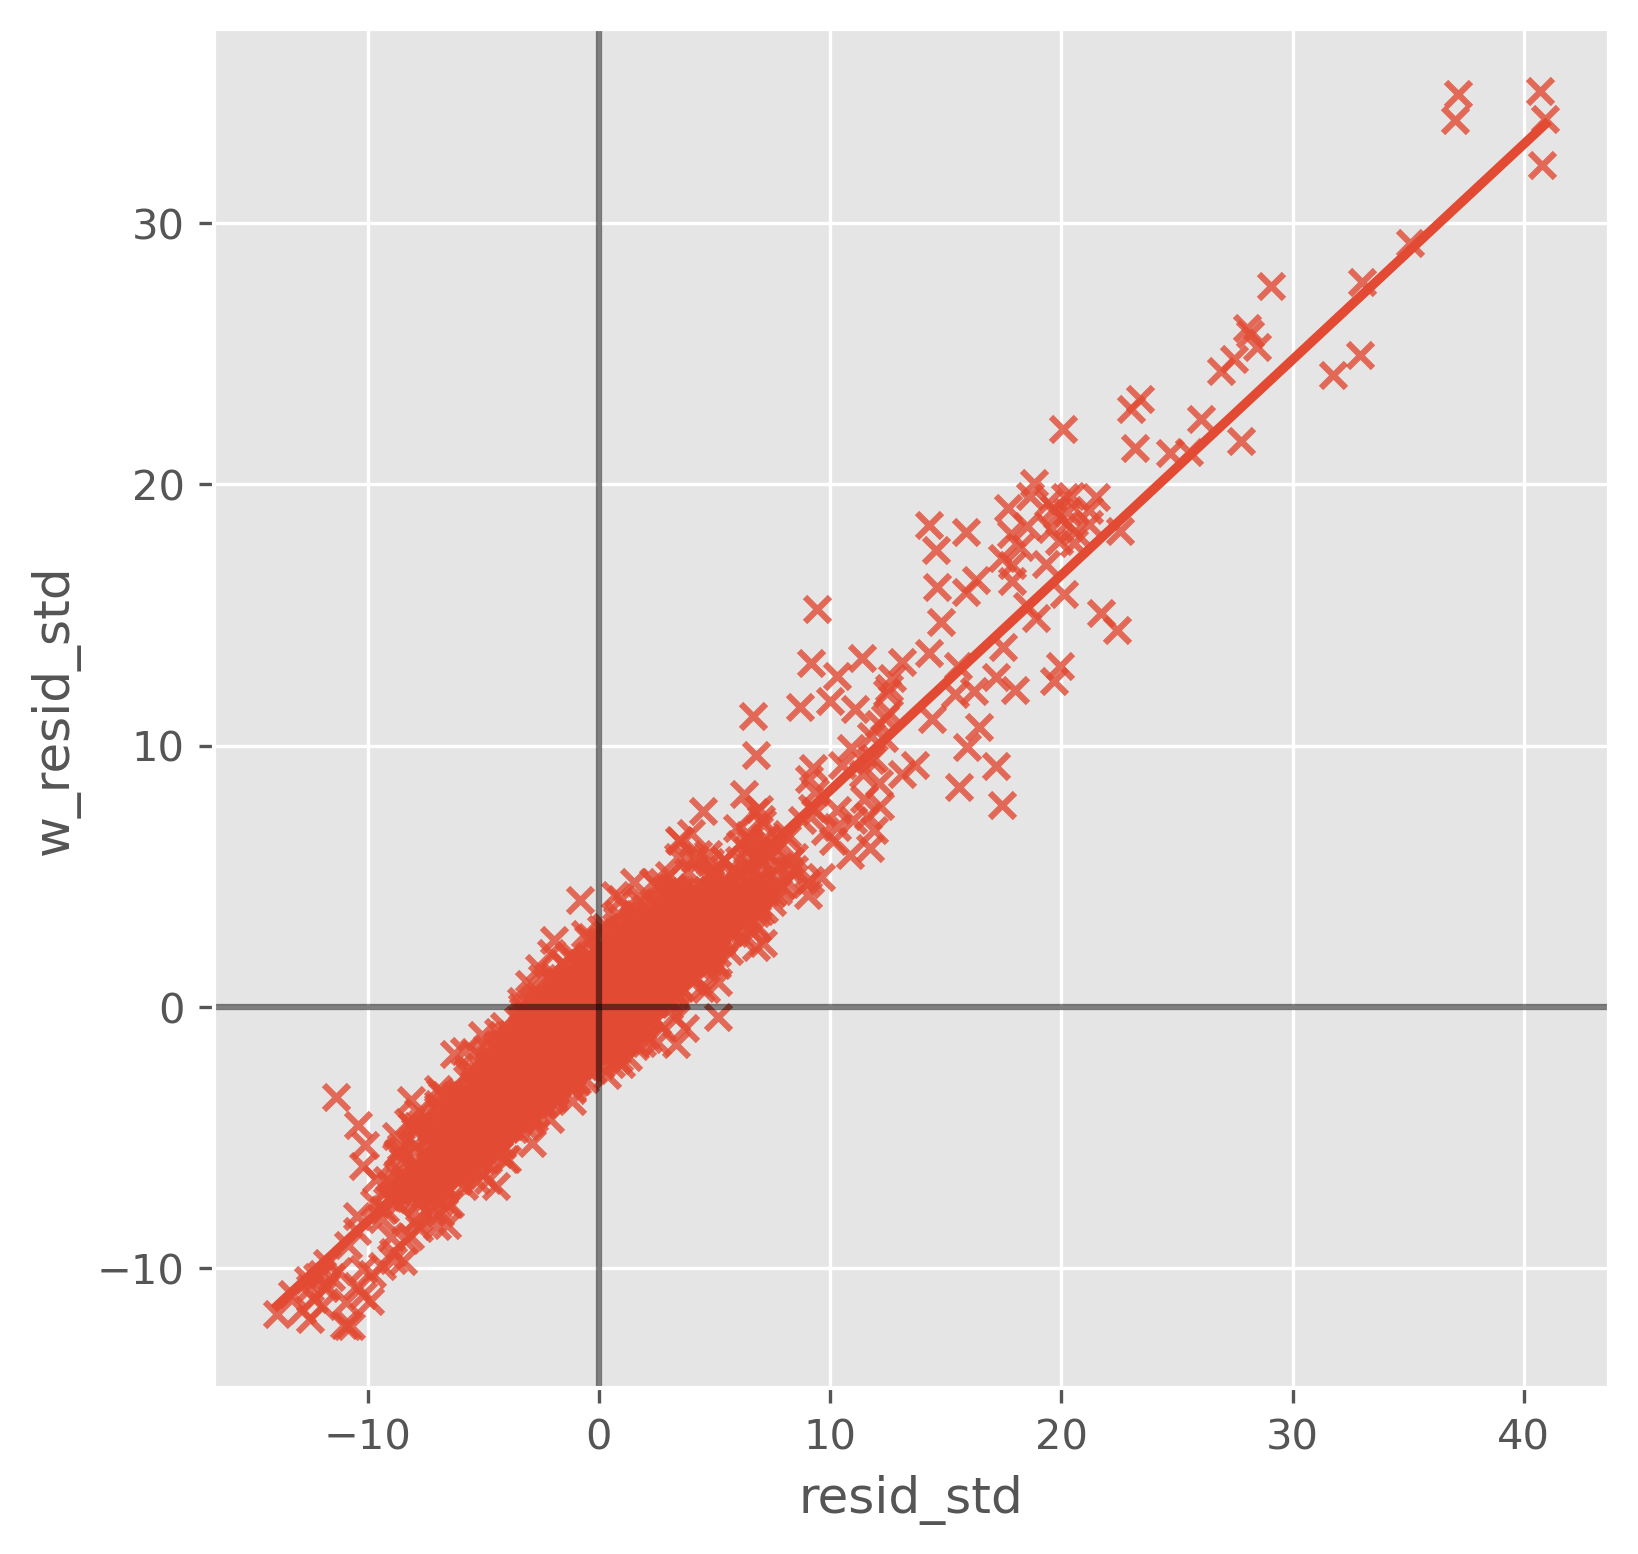

In [804]:
# Set up the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6),dpi =300)
# Plot values
sns.regplot(x="resid_std", y="w_resid_std", data=auto_cor, ci=None,marker='x')
# Add vertical and horizontal lines
plt.axvline(0, c="k", alpha=0.5)
plt.axhline(0, c="k", alpha=0.5)
# # Add text labels for each quadrant
# plt.text(600, 800, "HH", fontsize=10, c="black")
# plt.text(600, -80, "HL", fontsize=10, c="black")
# plt.text(-80, 600, "LH", fontsize=10, c="black")
# plt.text(-80, -80, "LL", fontsize=10, c="black")
# Display
# plt.savefig("viz/moranI.png")

plt.show()

In [774]:
from splot import esda as esdaplot
from pysal.explore import esda
from esda.moran import Moran_Local
from splot.esda import lisa_cluster

In [775]:
mi = esda.Moran(auto_cor['resid'], w)
print(mi.I)
print(mi.p_sim)

0.8247539751698515
0.001


In [776]:
mi.I

0.8247539751698515

In [777]:
mi.p_sim

0.001

In [778]:
mi.z_norm

118.94207677245197

In [779]:
lisa = esda.moran.Moran_Local(auto_cor["resid"], w)

In [780]:
lisa

In [781]:
auto_cor

LSOA11CD                     total_access_index10                                           geometry                                    resid                                resid_std                              w_resid_std
0     E01000001                                  50.9638  POLYGON ((532105.092 182011.230, 532162.491 18...                                  11.5348                                  11.4550                                   7.9651
1     E01000002                                  55.5735  POLYGON ((532746.813 181786.891, 532671.688 18...                                  10.2098                                  10.1300                                   6.3481
2     E01000003                                  28.3517  POLYGON ((532135.145 182198.119, 532158.250 18...                                   9.1021                                   9.0224                                   4.2891
3     E01000005                                  62.1861  POLYGON ((533807.946 180767.770, 533649.063 18...                                   4.0653                                   3.9855                                   1.6525
4     E01000006                                  22.0700  POLYGON ((545122.049 184314.931, 545271.917 18...                                   7.1067                                   7.0269                                   4.4126
...         ...                                      ...                                                ...                                      ...                                      ...                                      ...
4830  E01033742                                   3.5175  POLYGON ((544642.680 179824.674, 544766.313 17...                                   1.3716                                   1.2918                                   2.2170
4831  E01033743                                   3.4251  POLYGON ((546579.195 181097.813, 546687.036 18...                                  -0.1986                                  -0.2784                                  -0.2103
4832  E01033744                                   8.6087  POLYGON ((544536.486 179447.115, 544602.630 17...                                   3.1134                                   3.0336                                   2.7845
4833  E01033745                                   4.4576  POLYGON ((546415.745 180152.270, 546320.715 18...                                  -1.4912                                  -1.5710                                  -0.3919
4834  E01033746                                  14.5564  POLYGON ((538140.000 177313.000, 538129.177 17...                                  -1.9902                                  -2.0700                                  -1.5315

[4835 rows x 6 columns]

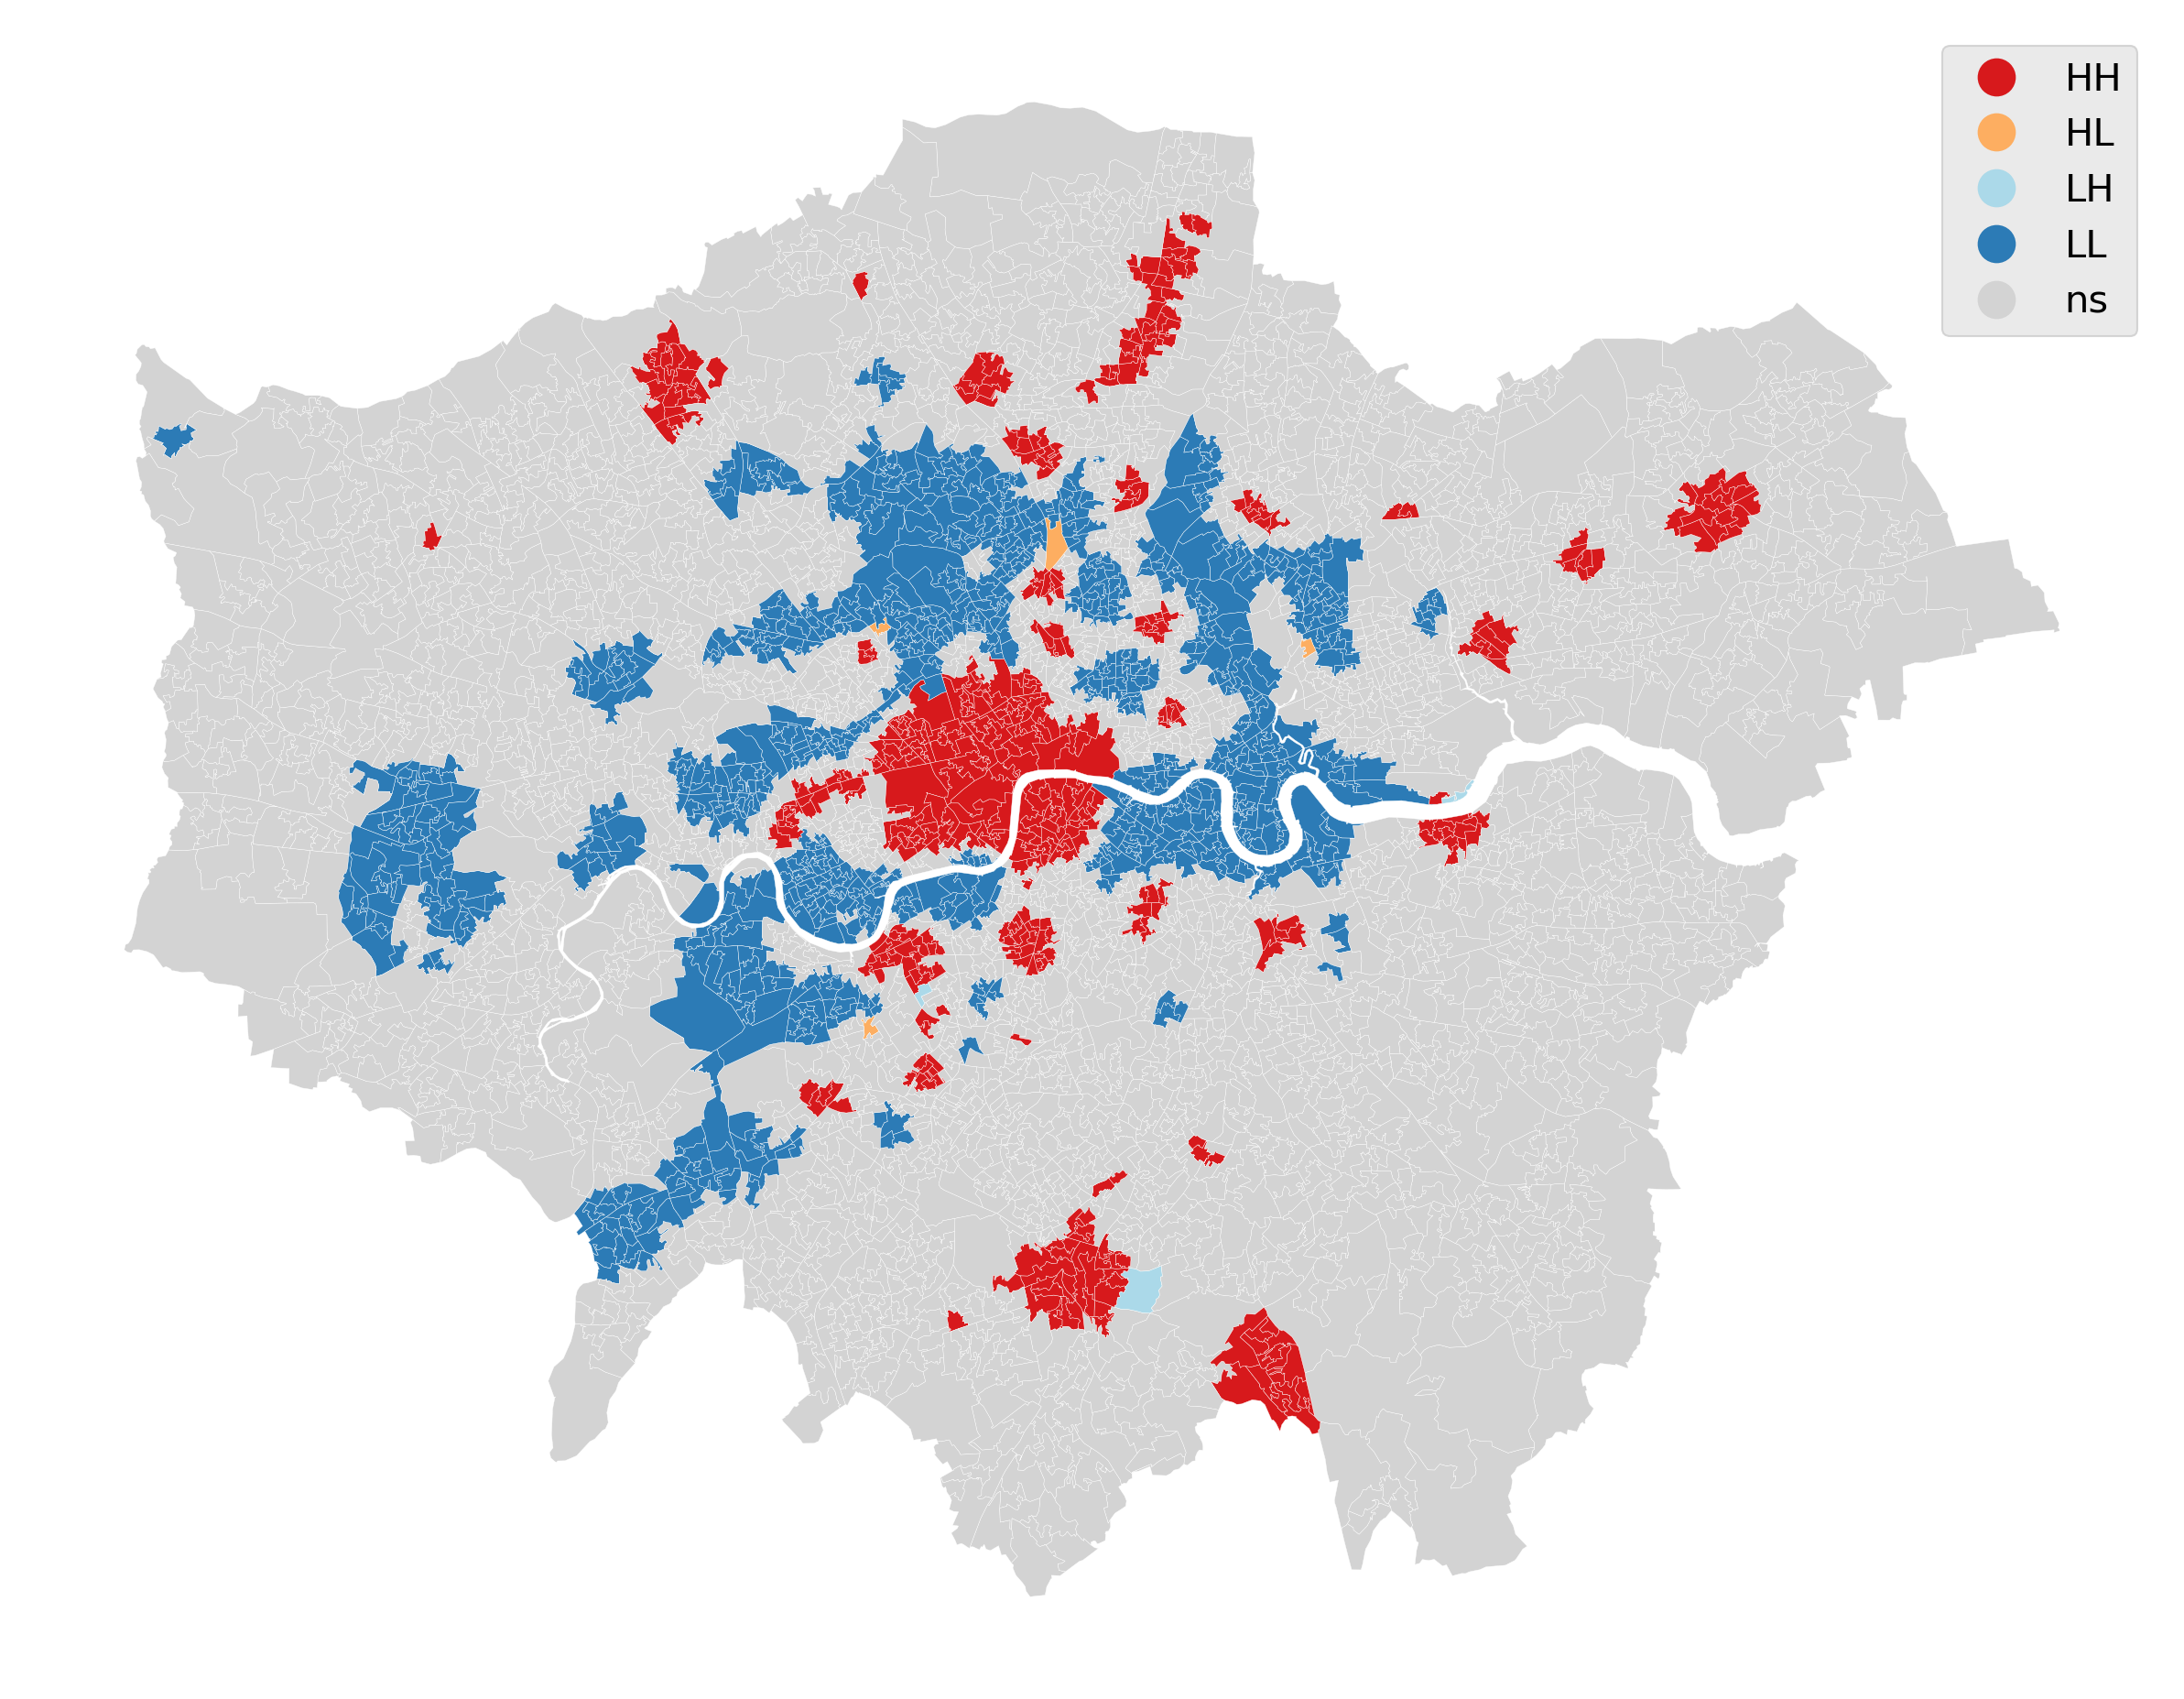

In [803]:
f, axs = plt.subplots(figsize=(10,10),dpi = 300)
ax = esdaplot.lisa_cluster(lisa, auto_cor, p=0.05,ax =axs)

plt.savefig("viz/lisa.png")
plt.show()